In [1]:
import folium
import pandas as pd
import geopandas as gpd
import requests
import os
import json

Step 1 : Downloading stations informations

In [2]:
def display_point(bixi_stations_geo):
    m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)
    folium.GeoJson(
        bixi_stations_geo,
        name="stations",
        marker = folium.CircleMarker(radius = 5, # Radius in metres
                                            weight = 0, #outline weight
                                            fill_color = "#D80641", 
                                            fill_opacity = 1),
    ).add_to(m)
    return m

def display_station(gdf_polygons,bixi_stations_geo):
    m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)
    folium.GeoJson(
        gdf_polygons,
        name="Paving",
        style_function=lambda feature: {
            'fillColor': "#ad2121ff",  # transparent fill
            'color': 'blue',           # border color
            'weight': 1,
            'fillOpacity': 0
        }).add_to(m)
    return m

In [3]:
def station_point_finder(bixi_stations_geo,station_ix_str,gdf_polygons):
    filtered_point = bixi_stations_geo[bixi_stations_geo['station_id'] == station_ix_str]
    filtered_polygon = gdf_polygons[gdf_polygons['station_id'] == station_ix_str]
    m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)
    folium.GeoJson(
        filtered_point,
        name="stations",
        marker = folium.CircleMarker(radius = 5, # Radius in metres
                                            weight = 0, #outline weight
                                            fill_color = "#D80641", 
                                            fill_opacity = 1),
    ).add_to(m)

    folium.GeoJson(
    filtered_polygon,
    name="Paving",
    style_function=lambda feature: {
        'fillColor': "#ad2121ff",  # transparent fill
        'color': 'blue',           # border color
        'weight': 1,
        'fillOpacity': 0
    }).add_to(m)
    return m

In [4]:
def display_station_polygon(bixi_stations_geo,gdf_polygons):
    m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)
    folium.GeoJson(
        bixi_stations_geo,
        name="stations",
        marker = folium.CircleMarker(radius = 5, # Radius in metres
                                            weight = 0, #outline weight
                                            fill_color = "#D80641", 
                                            fill_opacity = 1),
    ).add_to(m)

    folium.GeoJson(
    gdf_polygons,
    name="Paving",
    style_function=lambda feature: {
        'fillColor': "#ad2121ff",  # transparent fill
        'color': 'blue',           # border color
        'weight': 1,
        'fillOpacity': 0
    }).add_to(m)
    return m

In [5]:
stations_info_file = "station_information.json"
stations_info_url = "https://gbfs.velobixi.com/gbfs/en/station_information.json"
if not os.path.exists(stations_info_file):
    print(f"Downloading {stations_info_file} ...")
    response = requests.get(stations_info_url)
    if response.ok :
        with open(stations_info_file,"w",encoding='utf-8') as f:
            f.write(response.text)
    print("Done!")

In [6]:
station_status_file = "station_status.json"
station_status_url = "https://gbfs.velobixi.com/gbfs/en/station_status.json"
print(f"Downloading {station_status_file} ...")
response = requests.get(station_status_url)
if response.ok :
    with open(station_status_file,"w",encoding='utf-8') as f:
        f.write(response.text)
print("Done!")

Done!


In [7]:
data = {}
with open(stations_info_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [8]:
bixi_stations = pd.DataFrame(data["data"]["stations"])

In [9]:
data = {}
with open(station_status_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [10]:
station_status = pd.DataFrame(data["data"]["stations"])

In [11]:
bixi_stations

station_id                           external_id  \
0            1  0b0fda98-08f3-11e7-a1cb-3863bb33a4e4   
1            2  0b0fdf05-08f3-11e7-a1cb-3863bb33a4e4   
2            3  0b0fe114-08f3-11e7-a1cb-3863bb33a4e4   
3            4  0b0fe2b5-08f3-11e7-a1cb-3863bb33a4e4   
4            5  0b0fe458-08f3-11e7-a1cb-3863bb33a4e4   
..         ...                                   ...   
952       1059  66af5c56-f0ec-40b6-8562-8015007f2fab   
953       1060  c65ad946-fdc6-4c45-b8fb-9968959e19b7   
954       1061  0e3b644e-d688-4634-90cc-f632e3fce919   
955       1062  c34a9829-5d77-4138-b668-b653c86946b3   
956       1073  05c4553d-89e3-4b91-8489-664ecf637338   

                                         name short_name        lat  \
0                   Drummond / de Maisonneuve       6001  45.499480   
1                      Ste-Catherine / Dézéry       6002  45.539385   
2                               Clark / Evans       6003  45.511099   
3                  du Champ-de-Mars / Gosford       6004  45.509655   
4                          Brittany / Ainsley       6005  45.525890   
..                                        ...        ...        ...   
952         Cavendish / Dr.-Frederick-Philips       8164  45.497365   
953   Parc du Père-Marquette (de Bellechasse)       8266  45.539528   
954  Métro Champs-de-Mars (Viger / Sanguinet)       8268  45.510349   
955      Place des Montréalaises (St-Antoine)       8269  45.508825   
956                     de la Commune / Berri       8272  45.510717   

           lon     rental_methods  capacity  electric_bike_surcharge_waiver  \
0   -73.575977  [KEY, CREDITCARD]        19                           False   
1   -73.541000  [KEY, CREDITCARD]        27                           False   
2   -73.567843  [KEY, CREDITCARD]        19                           False   
3   -73.554009  [KEY, CREDITCARD]        23                           False   
4   -73.650034  [KEY, CREDITCARD]        23                           False   
..         ...                ...       ...                             ...   
952 -73.700855  [KEY, CREDITCARD]        19                           False   
953 -73.594971  [KEY, CREDITCARD]        36                           False   
954 -73.556686  [KEY, CREDITCARD]        37                           False   
955 -73.555984  [KEY, CREDITCARD]        17                           False   
956 -73.550071  [KEY, CREDITCARD]         5                           False   

     is_charging  eightd_has_key_dispenser  has_kiosk eightd_station_services  
0          False                     False       True                     NaN  
1          False                     False       True                     NaN  
2          False                     False       True                     NaN  
3          False                     False       True                     NaN  
4          False                     False       True                     NaN  
..           ...                       ...        ...                     ...  
952         True                     False       True                     NaN  
953        False                     False       True                     NaN  
954         True                     False       True                     NaN  
955         True                     False       True                     NaN  
956        False                     False       True                     NaN  

[957 rows x 13 columns]

In [12]:
station_status[["station_id","num_bikes_available"]]

station_id  num_bikes_available
0            1                    7
1            2                    2
2            3                    5
3            4                    0
4            5                   11
..         ...                  ...
952       1059                    2
953       1060                   34
954       1061                    2
955       1062                    0
956       1073                    0

[957 rows x 2 columns]

In [13]:
bixi_stations_geo = gpd.GeoDataFrame(bixi_stations,geometry=gpd.points_from_xy(bixi_stations["lon"],bixi_stations["lat"]),    crs='EPSG:4326')

In [14]:
bixi_stations_geo

station_id                           external_id  \
0            1  0b0fda98-08f3-11e7-a1cb-3863bb33a4e4   
1            2  0b0fdf05-08f3-11e7-a1cb-3863bb33a4e4   
2            3  0b0fe114-08f3-11e7-a1cb-3863bb33a4e4   
3            4  0b0fe2b5-08f3-11e7-a1cb-3863bb33a4e4   
4            5  0b0fe458-08f3-11e7-a1cb-3863bb33a4e4   
..         ...                                   ...   
952       1059  66af5c56-f0ec-40b6-8562-8015007f2fab   
953       1060  c65ad946-fdc6-4c45-b8fb-9968959e19b7   
954       1061  0e3b644e-d688-4634-90cc-f632e3fce919   
955       1062  c34a9829-5d77-4138-b668-b653c86946b3   
956       1073  05c4553d-89e3-4b91-8489-664ecf637338   

                                         name short_name        lat  \
0                   Drummond / de Maisonneuve       6001  45.499480   
1                      Ste-Catherine / Dézéry       6002  45.539385   
2                               Clark / Evans       6003  45.511099   
3                  du Champ-de-Mars / Gosford       6004  45.509655   
4                          Brittany / Ainsley       6005  45.525890   
..                                        ...        ...        ...   
952         Cavendish / Dr.-Frederick-Philips       8164  45.497365   
953   Parc du Père-Marquette (de Bellechasse)       8266  45.539528   
954  Métro Champs-de-Mars (Viger / Sanguinet)       8268  45.510349   
955      Place des Montréalaises (St-Antoine)       8269  45.508825   
956                     de la Commune / Berri       8272  45.510717   

           lon     rental_methods  capacity  electric_bike_surcharge_waiver  \
0   -73.575977  [KEY, CREDITCARD]        19                           False   
1   -73.541000  [KEY, CREDITCARD]        27                           False   
2   -73.567843  [KEY, CREDITCARD]        19                           False   
3   -73.554009  [KEY, CREDITCARD]        23                           False   
4   -73.650034  [KEY, CREDITCARD]        23                           False   
..         ...                ...       ...                             ...   
952 -73.700855  [KEY, CREDITCARD]        19                           False   
953 -73.594971  [KEY, CREDITCARD]        36                           False   
954 -73.556686  [KEY, CREDITCARD]        37                           False   
955 -73.555984  [KEY, CREDITCARD]        17                           False   
956 -73.550071  [KEY, CREDITCARD]         5                           False   

     is_charging  eightd_has_key_dispenser  has_kiosk eightd_station_services  \
0          False                     False       True                     NaN   
1          False                     False       True                     NaN   
2          False                     False       True                     NaN   
3          False                     False       True                     NaN   
4          False                     False       True                     NaN   
..           ...                       ...        ...                     ...   
952         True                     False       True                     NaN   
953        False                     False       True                     NaN   
954         True                     False       True                     NaN   
955         True                     False       True                     NaN   
956        False                     False       True                     NaN   

                       geometry  
0    POINT (-73.57598 45.49948)  
1      POINT (-73.541 45.53939)  
2     POINT (-73.56784 45.5111)  
3    POINT (-73.55401 45.50966)  
4    POINT (-73.65003 45.52589)  
..                          ...  
952  POINT (-73.70086 45.49737)  
953  POINT (-73.59497 45.53953)  
954  POINT (-73.55669 45.51035)  
955  POINT (-73.55598 45.50883)  
956  POINT (-73.55007 45.51072)  

[957 rows x 14 columns]

In [15]:
filtered_gdf = bixi_stations_geo[bixi_stations_geo['station_id'] == "1"]


In [16]:
filtered_gdf

station_id                           external_id                       name  \
0          1  0b0fda98-08f3-11e7-a1cb-3863bb33a4e4  Drummond / de Maisonneuve   

  short_name       lat        lon     rental_methods  capacity  \
0       6001  45.49948 -73.575977  [KEY, CREDITCARD]        19   

   electric_bike_surcharge_waiver  is_charging  eightd_has_key_dispenser  \
0                           False        False                     False   

   has_kiosk eightd_station_services                    geometry  
0       True                     NaN  POINT (-73.57598 45.49948)

In [17]:
m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)

folium.GeoJson(
    filtered_gdf,
    name="stations",
    marker = folium.CircleMarker(radius = 5, # Radius in metres
                                           weight = 0, #outline weight
                                           fill_color = "#D80641", 
                                           fill_opacity = 1),
).add_to(m)

m

In [18]:
import geopandas as gpd
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, Point
from shapely.ops import clip_by_rect

In [19]:
coords = np.vstack([bixi_stations_geo.geometry.x, bixi_stations_geo.geometry.y]).T

In [20]:
len(coords)

957

In [21]:
vor = Voronoi(coords)

In [22]:
vor.npoints

957

In [23]:
len(vor.point_region)

957

In [24]:
polygons = []
points = []
bad_points = []
for i, region_ix in enumerate(vor.point_region):
    region = vor.regions[region_ix]
    if -1 not in region:
        polygons.append(Polygon([vor.vertices[j] for j in region if j != -1]))
        points.append(bixi_stations_geo.loc[i, "station_id"])
    else:
        bad_points.append(bixi_stations_geo.loc[i, "station_id"])

In [25]:
len(points) + len(bad_points)

957

In [26]:
len(bixi_stations_geo)

957

In [27]:
gdf_polygons = gpd.GeoDataFrame({
    'station_id': points,           # your ID array
    'geometry': polygons    # your polygons array
}, crs="EPSG:4326")

In [28]:
bixi_stations

station_id                           external_id  \
0            1  0b0fda98-08f3-11e7-a1cb-3863bb33a4e4   
1            2  0b0fdf05-08f3-11e7-a1cb-3863bb33a4e4   
2            3  0b0fe114-08f3-11e7-a1cb-3863bb33a4e4   
3            4  0b0fe2b5-08f3-11e7-a1cb-3863bb33a4e4   
4            5  0b0fe458-08f3-11e7-a1cb-3863bb33a4e4   
..         ...                                   ...   
952       1059  66af5c56-f0ec-40b6-8562-8015007f2fab   
953       1060  c65ad946-fdc6-4c45-b8fb-9968959e19b7   
954       1061  0e3b644e-d688-4634-90cc-f632e3fce919   
955       1062  c34a9829-5d77-4138-b668-b653c86946b3   
956       1073  05c4553d-89e3-4b91-8489-664ecf637338   

                                         name short_name        lat  \
0                   Drummond / de Maisonneuve       6001  45.499480   
1                      Ste-Catherine / Dézéry       6002  45.539385   
2                               Clark / Evans       6003  45.511099   
3                  du Champ-de-Mars / Gosford       6004  45.509655   
4                          Brittany / Ainsley       6005  45.525890   
..                                        ...        ...        ...   
952         Cavendish / Dr.-Frederick-Philips       8164  45.497365   
953   Parc du Père-Marquette (de Bellechasse)       8266  45.539528   
954  Métro Champs-de-Mars (Viger / Sanguinet)       8268  45.510349   
955      Place des Montréalaises (St-Antoine)       8269  45.508825   
956                     de la Commune / Berri       8272  45.510717   

           lon     rental_methods  capacity  electric_bike_surcharge_waiver  \
0   -73.575977  [KEY, CREDITCARD]        19                           False   
1   -73.541000  [KEY, CREDITCARD]        27                           False   
2   -73.567843  [KEY, CREDITCARD]        19                           False   
3   -73.554009  [KEY, CREDITCARD]        23                           False   
4   -73.650034  [KEY, CREDITCARD]        23                           False   
..         ...                ...       ...                             ...   
952 -73.700855  [KEY, CREDITCARD]        19                           False   
953 -73.594971  [KEY, CREDITCARD]        36                           False   
954 -73.556686  [KEY, CREDITCARD]        37                           False   
955 -73.555984  [KEY, CREDITCARD]        17                           False   
956 -73.550071  [KEY, CREDITCARD]         5                           False   

     is_charging  eightd_has_key_dispenser  has_kiosk eightd_station_services  
0          False                     False       True                     NaN  
1          False                     False       True                     NaN  
2          False                     False       True                     NaN  
3          False                     False       True                     NaN  
4          False                     False       True                     NaN  
..           ...                       ...        ...                     ...  
952         True                     False       True                     NaN  
953        False                     False       True                     NaN  
954         True                     False       True                     NaN  
955         True                     False       True                     NaN  
956        False                     False       True                     NaN  

[957 rows x 13 columns]

In [29]:
gdf_polygons

station_id                                           geometry
0            1  POLYGON ((-73.57495 45.49935, -73.57619 45.500...
1            2  POLYGON ((-73.52858 45.53473, -73.52833 45.535...
2            3  POLYGON ((-73.56634 45.51202, -73.56672 45.509...
3            4  POLYGON ((-73.55241 45.51156, -73.55191 45.509...
4            5  POLYGON ((-73.64538 45.52883, -73.64304 45.523...
..         ...                                                ...
939       1059  POLYGON ((-73.69956 45.50789, -73.7015 45.5070...
940       1060  POLYGON ((-73.5941 45.5383, -73.59258 45.5394,...
941       1061  POLYGON ((-73.55821 45.51235, -73.55687 45.512...
942       1062  POLYGON ((-73.55745 45.50701, -73.55466 45.508...
943       1073  POLYGON ((-73.5524 45.5116, -73.54449 45.51315...

[944 rows x 2 columns]

In [30]:
m = folium.Map(location=[bixi_stations_geo['lat'].mean(), bixi_stations_geo['lon'].mean()], zoom_start=13)
# Add arrondissements as GeoJson overlay
import folium
import branca.colormap as cm

# Suppose your GeoDataFrame is gdf_polygons with a numeric 'id' column
gdf_polygons["id"] = gdf_polygons["station_id"].astype(int)
# 1. Create a colormap scaled to the min and max of your 'id'
min_id = gdf_polygons['id'].min()
max_id = gdf_polygons['id'].max()

colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # gradient colors
    vmin=min_id,
    vmax=max_id,
    caption='ID Gradient'
)

# 2. Define style_function to use the colormap for fillColor
def style_function(feature):
    id_val = feature['properties']['id']
    return {
        'fillColor': colormap(id_val),
        'color': 'black',      # polygon border color
        'weight': 1,
        'fillOpacity': 0.7
    }

# 3. Add GeoJson layer with style_function
folium.GeoJson(
    gdf_polygons,
    style_function=style_function,
    name="Polygons"
).add_to(m)

# 4. Add the colormap legend to the map
colormap.add_to(m)
m


In [31]:
filtered_gdf = gdf_polygons[gdf_polygons['station_id'] == "1"]

In [32]:
filtered_gdf

station_id                                           geometry  id
0          1  POLYGON ((-73.57495 45.49935, -73.57619 45.500...   1

In [33]:
station_point_finder(bixi_stations_geo,"1",gdf_polygons)

In [34]:
gdf_polygons.drop(columns=["id"],inplace=True)

In [43]:
bixi_stations

station_id                           external_id  \
0            1  0b0fda98-08f3-11e7-a1cb-3863bb33a4e4   
1            2  0b0fdf05-08f3-11e7-a1cb-3863bb33a4e4   
2            3  0b0fe114-08f3-11e7-a1cb-3863bb33a4e4   
3            4  0b0fe2b5-08f3-11e7-a1cb-3863bb33a4e4   
4            5  0b0fe458-08f3-11e7-a1cb-3863bb33a4e4   
..         ...                                   ...   
952       1059  66af5c56-f0ec-40b6-8562-8015007f2fab   
953       1060  c65ad946-fdc6-4c45-b8fb-9968959e19b7   
954       1061  0e3b644e-d688-4634-90cc-f632e3fce919   
955       1062  c34a9829-5d77-4138-b668-b653c86946b3   
956       1073  05c4553d-89e3-4b91-8489-664ecf637338   

                                         name short_name        lat  \
0                   Drummond / de Maisonneuve       6001  45.499480   
1                      Ste-Catherine / Dézéry       6002  45.539385   
2                               Clark / Evans       6003  45.511099   
3                  du Champ-de-Mars / Gosford       6004  45.509655   
4                          Brittany / Ainsley       6005  45.525890   
..                                        ...        ...        ...   
952         Cavendish / Dr.-Frederick-Philips       8164  45.497365   
953   Parc du Père-Marquette (de Bellechasse)       8266  45.539528   
954  Métro Champs-de-Mars (Viger / Sanguinet)       8268  45.510349   
955      Place des Montréalaises (St-Antoine)       8269  45.508825   
956                     de la Commune / Berri       8272  45.510717   

           lon     rental_methods  capacity  electric_bike_surcharge_waiver  \
0   -73.575977  [KEY, CREDITCARD]        19                           False   
1   -73.541000  [KEY, CREDITCARD]        27                           False   
2   -73.567843  [KEY, CREDITCARD]        19                           False   
3   -73.554009  [KEY, CREDITCARD]        23                           False   
4   -73.650034  [KEY, CREDITCARD]        23                           False   
..         ...                ...       ...                             ...   
952 -73.700855  [KEY, CREDITCARD]        19                           False   
953 -73.594971  [KEY, CREDITCARD]        36                           False   
954 -73.556686  [KEY, CREDITCARD]        37                           False   
955 -73.555984  [KEY, CREDITCARD]        17                           False   
956 -73.550071  [KEY, CREDITCARD]         5                           False   

     is_charging  eightd_has_key_dispenser  has_kiosk eightd_station_services  
0          False                     False       True                     NaN  
1          False                     False       True                     NaN  
2          False                     False       True                     NaN  
3          False                     False       True                     NaN  
4          False                     False       True                     NaN  
..           ...                       ...        ...                     ...  
952         True                     False       True                     NaN  
953        False                     False       True                     NaN  
954         True                     False       True                     NaN  
955         True                     False       True                     NaN  
956        False                     False       True                     NaN  

[957 rows x 13 columns]

In [ ]:
id_name_df = bixi_stations[["station_id","name"]]

In [ ]:
gdf_polygons = pd.merge(gdf_polygons,id_name_df,how="left",on="station_id")

station_id                                           geometry  \
0            1  POLYGON ((-73.57495 45.49935, -73.57619 45.500...   
1            2  POLYGON ((-73.52858 45.53473, -73.52833 45.535...   
2            3  POLYGON ((-73.56634 45.51202, -73.56672 45.509...   
3            4  POLYGON ((-73.55241 45.51156, -73.55191 45.509...   
4            5  POLYGON ((-73.64538 45.52883, -73.64304 45.523...   
..         ...                                                ...   
939       1059  POLYGON ((-73.69956 45.50789, -73.7015 45.5070...   
940       1060  POLYGON ((-73.5941 45.5383, -73.59258 45.5394,...   
941       1061  POLYGON ((-73.55821 45.51235, -73.55687 45.512...   
942       1062  POLYGON ((-73.55745 45.50701, -73.55466 45.508...   
943       1073  POLYGON ((-73.5524 45.5116, -73.54449 45.51315...   

                                         name  
0                   Drummond / de Maisonneuve  
1                      Ste-Catherine / Dézéry  
2                               Clark / Evans  
3                  du Champ-de-Mars / Gosford  
4                          Brittany / Ainsley  
..                                        ...  
939         Cavendish / Dr.-Frederick-Philips  
940   Parc du Père-Marquette (de Bellechasse)  
941  Métro Champs-de-Mars (Viger / Sanguinet)  
942      Place des Montréalaises (St-Antoine)  
943                     de la Commune / Berri  

[944 rows x 3 columns]

In [35]:
gdf_polygons.to_file("paving_with_stations_ids.geojson",driver="GeoJSON")

In [36]:
display_station_polygon(bixi_stations_geo,gdf_polygons)

In [37]:
bad_stations = bixi_stations_geo[bixi_stations_geo["station_id"].isin(bad_points)]

In [38]:
display_point(bad_stations)

In [39]:
display_station(gdf_polygons,bixi_stations)

In [40]:
gdf_merged = gdf_polygons.merge(station_status, on="station_id", how="left")

def get_color(num_bikes):
    if pd.isna(num_bikes):
        return "gray"  # For missing data
    elif num_bikes == 0:
        return "#FF0000"  # Bright Red
    elif num_bikes < 5:
        return "#FFA500"  # Orange
    elif num_bikes <= 10:
        return "#FFFF00"  # Yellow
    else:
        return "#008000"  # Green

m = folium.Map(location=[gdf_polygons.geometry.centroid.y.mean(), gdf_polygons.geometry.centroid.x.mean()], zoom_start=13)
folium.GeoJson(
    gdf_merged,
    name="Bixi Stations",
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['num_bikes_available']),
        'color': 'blue',
        'weight': 0,
        'fillOpacity': 0.4
    }
).add_to(m)

m

/var/folders/wf/mk3xyd5533b95_xs35xywm480000gn/T/ipykernel_75606/1232161933.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf_polygons.geometry.centroid.y.mean(), gdf_polygons.geometry.centroid.x.mean()], zoom_start=13)


In [41]:
filtered_gdf
m = folium.Map(location=[bixi_stations["lat"].mean(), bixi_stations["lon"].mean()], zoom_start=6)
folium.GeoJson(
    filtered_gdf,
    name="Arrondissements",
    style_function=lambda feature: {
        'fillColor': "#ad2121ff",  # transparent fill
        'color': 'blue',           # border color
        'weight': 1,
        'fillOpacity': 0
    }
).add_to(m)
m

In [42]:

m = folium.Map(location=[bixi_stations["lat"].mean(), bixi_stations["lon"].mean()], zoom_start=6,tiles=None)

folium.Choropleth(
    geo_data=polygons,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valeur par département',
).add_to(m)


ValueError: Cannot render objects with any missing geometries: [<POLYGON ((-73.575 45.499, -73.576 45.501, -73.577 45.5, -73.577 45.499, -73...>, <POLYGON ((-73.529 45.535, -73.528 45.536, -73.541 45.543, -73.541 45.543, -...>, <POLYGON ((-73.566 45.512, -73.567 45.509, -73.569 45.51, -73.57 45.511, -73...>, <POLYGON ((-73.552 45.512, -73.552 45.51, -73.554 45.508, -73.555 45.508, -7...>, <POLYGON ((-73.645 45.529, -73.643 45.523, -73.647 45.52, -73.654 45.518, -7...>, <POLYGON ((-73.556 45.496, -73.555 45.494, -73.556 45.494, -73.558 45.493, -...>, <POLYGON ((-73.564 45.512, -73.564 45.511, -73.563 45.51, -73.56 45.511, -73...>, <POLYGON ((-73.561 45.514, -73.559 45.511, -73.56 45.51, -73.56 45.511, -73....>, <POLYGON ((-73.576 45.498, -73.576 45.498, -73.577 45.499, -73.578 45.499, -...>, <POLYGON ((-73.539 45.612, -73.54 45.644, -73.524 45.626, -73.528 45.607, -7...>, <POLYGON ((-73.575 45.551, -73.576 45.549, -73.573 45.547, -73.573 45.547, -...>, <POLYGON ((-73.572 45.502, -73.572 45.501, -73.573 45.5, -73.574 45.5, -73.5...>, <POLYGON ((-73.562 45.514, -73.562 45.512, -73.564 45.512, -73.564 45.513, -...>, <POLYGON ((-73.56 45.515, -73.561 45.514, -73.559 45.511, -73.558 45.512, -7...>, <POLYGON ((-73.56 45.515, -73.561 45.514, -73.562 45.514, -73.562 45.515, -7...>, <POLYGON ((-73.52 45.459, -73.504 45.454, -73.505 45.459, -73.507 45.466, -7...>, <POLYGON ((-73.563 45.52, -73.566 45.519, -73.566 45.521, -73.564 45.523, -7...>, <POLYGON ((-73.562 45.518, -73.562 45.519, -73.563 45.52, -73.566 45.519, -7...>, <POLYGON ((-73.566 45.519, -73.566 45.519, -73.568 45.519, -73.57 45.518, -7...>, <POLYGON ((-73.566 45.512, -73.567 45.515, -73.568 45.513, -73.566 45.512, -...>, <POLYGON ((-73.561 45.521, -73.562 45.519, -73.563 45.52, -73.564 45.523, -7...>, <POLYGON ((-73.554 45.498, -73.554 45.498, -73.548 45.498, -73.554 45.498, -...>, <POLYGON ((-73.597 45.525, -73.597 45.527, -73.598 45.527, -73.599 45.526, -...>, <POLYGON ((-73.557 45.505, -73.553 45.507, -73.554 45.508, -73.555 45.508, -...>, <POLYGON ((-73.549 45.504, -73.552 45.506, -73.553 45.507, -73.554 45.508, -...>, <POLYGON ((-73.574 45.502, -73.574 45.502, -73.574 45.502, -73.573 45.502, -...>, <POLYGON ((-73.584 45.479, -73.585 45.481, -73.582 45.482, -73.582 45.482, -...>, <POLYGON ((-73.559 45.503, -73.56 45.504, -73.56 45.505, -73.557 45.506, -73...>, <POLYGON ((-73.561 45.506, -73.56 45.505, -73.557 45.506, -73.557 45.507, -7...>, <POLYGON ((-73.568 45.519, -73.566 45.519, -73.566 45.519, -73.566 45.521, -...>, <POLYGON ((-73.563 45.506, -73.563 45.505, -73.563 45.505, -73.562 45.504, -...>, <POLYGON ((-73.552 45.502, -73.549 45.502, -73.549 45.504, -73.552 45.506, -...>, <POLYGON ((-73.582 45.528, -73.583 45.527, -73.582 45.526, -73.58 45.525, -7...>, <POLYGON ((-73.558 45.501, -73.557 45.502, -73.557 45.503, -73.559 45.503, -...>, <POLYGON ((-73.58 45.496, -73.579 45.496, -73.577 45.493, -73.578 45.493, -7...>, <POLYGON ((-73.559 45.503, -73.561 45.502, -73.562 45.502, -73.562 45.5, -73...>, <POLYGON ((-73.564 45.498, -73.564 45.498, -73.563 45.499, -73.565 45.501, -...>, <POLYGON ((-73.579 45.519, -73.579 45.519, -73.578 45.521, -73.579 45.522, -...>, <POLYGON ((-73.566 45.496, -73.568 45.499, -73.568 45.5, -73.568 45.5, -73.5...>, <POLYGON ((-73.576 45.508, -73.575 45.509, -73.574 45.508, -73.574 45.507, -...>, <POLYGON ((-73.596 45.541, -73.596 45.542, -73.598 45.544, -73.599 45.544, -...>, <POLYGON ((-73.556 45.496, -73.554 45.497, -73.554 45.498, -73.554 45.498, -...>, <POLYGON ((-73.56 45.499, -73.562 45.5, -73.563 45.499, -73.564 45.498, -73....>, <POLYGON ((-73.603 45.53, -73.603 45.53, -73.605 45.531, -73.605 45.532, -73...>, <POLYGON ((-73.554 45.497, -73.553 45.495, -73.546 45.494, -73.548 45.498, -...>, <POLYGON ((-73.569 45.508, -73.57 45.509, -73.57 45.509, -73.569 45.51, -73....>, <POLYGON ((-73.566 45.496, -73.569 45.497, -73.57 45.498, -73.568 45.499, -7...>, <POLYGON ((-73.572 45.497, -73.571 45.498, -73.57 45.498, -73.569 45.497, -7...>, <POLYGON ((-73.573 45.5, -73.572 45.501, -73.571 45.5, -73.571 45.498, -73.5...>, <POLYGON ((-73.615 45.528, -73.616 45.528, -73.617 45.526, -73.616 45.524, -...>, <POLYGON ((-73.572 45.503, -73.57 45.502, -73.569 45.501, -73.571 45.5, -73....>, <POLYGON ((-73.575 45.499, -73.576 45.498, -73.575 45.497, -73.574 45.497, -...>, <POLYGON ((-73.575 45.499, -73.574 45.5, -73.573 45.5, -73.573 45.498, -73.5...>, <POLYGON ((-73.575 45.499, -73.576 45.501, -73.576 45.501, -73.576 45.502, -...>, <POLYGON ((-73.582 45.504, -73.578 45.499, -73.579 45.498, -73.585 45.503, -...>, <POLYGON ((-73.545 45.517, -73.543 45.52, -73.543 45.52, -73.535 45.517, -73...>, <POLYGON ((-73.626 45.565, -73.622 45.574, -73.619 45.576, -73.612 45.573, -...>, <POLYGON ((-73.576 45.508, -73.575 45.506, -73.575 45.505, -73.576 45.505, -...>, <POLYGON ((-73.571 45.504, -73.571 45.504, -73.57 45.505, -73.571 45.506, -7...>, <POLYGON ((-73.52 45.547, -73.534 45.557, -73.534 45.557, -73.529 45.563, -7...>, <POLYGON ((-73.569 45.506, -73.568 45.504, -73.568 45.504, -73.566 45.504, -...>, <POLYGON ((-73.599 45.471, -73.601 45.468, -73.602 45.467, -73.609 45.473, -...>, <POLYGON ((-73.58 45.496, -73.58 45.496, -73.579 45.498, -73.579 45.498, -73...>, <POLYGON ((-73.58 45.548, -73.58 45.549, -73.585 45.552, -73.586 45.551, -73...>, <POLYGON ((-73.57 45.505, -73.569 45.506, -73.569 45.506, -73.568 45.504, -7...>, <POLYGON ((-73.556 45.496, -73.555 45.494, -73.555 45.494, -73.553 45.495, -...>, <POLYGON ((-73.566 45.496, -73.562 45.494, -73.562 45.494, -73.561 45.496, -...>, <POLYGON ((-73.596 45.527, -73.595 45.527, -73.593 45.529, -73.596 45.529, -...>, <POLYGON ((-73.572 45.496, -73.57 45.495, -73.57 45.494, -73.571 45.493, -73...>, <POLYGON ((-73.557 45.539, -73.556 45.536, -73.557 45.534, -73.56 45.534, -7...>, <POLYGON ((-73.575 45.497, -73.575 45.496, -73.573 45.495, -73.572 45.496, -...>, <POLYGON ((-73.603 45.533, -73.605 45.537, -73.606 45.537, -73.607 45.535, -...>, <POLYGON ((-73.587 45.49, -73.586 45.491, -73.583 45.49, -73.583 45.486, -73...>, <POLYGON ((-73.582 45.492, -73.586 45.493, -73.586 45.491, -73.583 45.49, -7...>, <POLYGON ((-73.636 45.541, -73.637 45.535, -73.637 45.535, -73.645 45.54, -7...>, <POLYGON ((-73.58 45.494, -73.581 45.494, -73.582 45.492, -73.579 45.492, -7...>, <POLYGON ((-73.576 45.498, -73.576 45.498, -73.576 45.498, -73.575 45.497, -...>, <POLYGON ((-73.563 45.509, -73.563 45.51, -73.564 45.511, -73.566 45.508, -7...>, <POLYGON ((-73.579 45.498, -73.579 45.498, -73.585 45.503, -73.592 45.504, -...>, <POLYGON ((-73.593 45.461, -73.593 45.465, -73.601 45.468, -73.602 45.467, -...>, <POLYGON ((-73.556 45.539, -73.556 45.539, -73.553 45.537, -73.549 45.538, -...>, <POLYGON ((-73.556 45.516, -73.555 45.514, -73.553 45.514, -73.551 45.516, -...>, <POLYGON ((-73.551 45.516, -73.548 45.517, -73.552 45.521, -73.554 45.519, -...>, <POLYGON ((-73.548 45.524, -73.548 45.524, -73.543 45.52, -73.545 45.517, -7...>, <POLYGON ((-73.58 45.495, -73.58 45.494, -73.579 45.492, -73.578 45.493, -73...>, <POLYGON ((-73.551 45.526, -73.553 45.527, -73.552 45.529, -73.548 45.529, -...>, <POLYGON ((-73.548 45.534, -73.548 45.529, -73.546 45.528, -73.539 45.528, -...>, <POLYGON ((-73.55 45.526, -73.548 45.529, -73.548 45.529, -73.546 45.528, -7...>, <POLYGON ((-73.557 45.518, -73.557 45.52, -73.558 45.521, -73.559 45.52, -73...>, <POLYGON ((-73.556 45.523, -73.555 45.524, -73.552 45.522, -73.552 45.522, -...>, <POLYGON ((-73.551 45.526, -73.553 45.527, -73.555 45.527, -73.555 45.525, -...>, <POLYGON ((-73.555 45.5, -73.557 45.502, -73.557 45.503, -73.556 45.504, -73...>, <POLYGON ((-73.509 45.606, -73.488 45.602, -73.517 45.594, -73.518 45.599, -...>, <POLYGON ((-73.571 45.506, -73.57 45.507, -73.569 45.506, -73.57 45.505, -73...>, <POLYGON ((-73.562 45.5, -73.563 45.499, -73.565 45.501, -73.563 45.503, -73...>, <POLYGON ((-73.555 45.525, -73.555 45.527, -73.556 45.528, -73.56 45.529, -7...>, <POLYGON ((-73.549 45.533, -73.553 45.535, -73.553 45.535, -73.554 45.533, -...>, <POLYGON ((-73.553 45.535, -73.556 45.536, -73.557 45.534, -73.556 45.532, -...>, <POLYGON ((-73.569 45.506, -73.57 45.507, -73.57 45.507, -73.569 45.508, -73...>, <POLYGON ((-73.558 45.522, -73.559 45.523, -73.559 45.525, -73.555 45.525, -...>, <POLYGON ((-73.551 45.532, -73.552 45.529, -73.556 45.532, -73.554 45.533, -...>, <POLYGON ((-73.629 45.503, -73.627 45.498, -73.633 45.498, -73.63 45.503, -7...>, <POLYGON ((-73.619 45.475, -73.623 45.48, -73.623 45.482, -73.619 45.488, -7...>, <POLYGON ((-73.616 45.538, -73.618 45.54, -73.62 45.538, -73.619 45.536, -73...>, <POLYGON ((-73.631 45.463, -73.638 45.466, -73.636 45.469, -73.629 45.469, -...>, <POLYGON ((-73.562 45.532, -73.561 45.532, -73.56 45.534, -73.563 45.536, -7...>, <POLYGON ((-73.565 45.533, -73.565 45.533, -73.564 45.535, -73.563 45.536, -...>, <POLYGON ((-73.565 45.53, -73.565 45.529, -73.562 45.527, -73.561 45.527, -7...>, <POLYGON ((-73.571 45.508, -73.57 45.509, -73.57 45.509, -73.573 45.511, -73...>, <POLYGON ((-73.577 45.507, -73.579 45.504, -73.579 45.504, -73.58 45.504, -7...>, <POLYGON ((-73.576 45.508, -73.575 45.509, -73.575 45.51, -73.577 45.511, -7...>, <POLYGON ((-73.561 45.544, -73.565 45.545, -73.565 45.544, -73.563 45.541, -...>, <POLYGON ((-73.593 45.504, -73.594 45.503, -73.596 45.496, -73.593 45.491, -...>, <POLYGON ((-73.605 45.532, -73.608 45.534, -73.607 45.535, -73.607 45.535, -...>, <POLYGON ((-73.605 45.531, -73.608 45.529, -73.609 45.53, -73.609 45.533, -7...>, <POLYGON ((-73.573 45.547, -73.573 45.547, -73.574 45.545, -73.574 45.543, -...>, <POLYGON ((-73.609 45.55, -73.61 45.548, -73.608 45.544, -73.605 45.546, -73...>, <POLYGON ((-73.601 45.551, -73.6 45.553, -73.604 45.556, -73.606 45.555, -73...>, <POLYGON ((-73.577 45.5, -73.58 45.504, -73.581 45.504, -73.582 45.504, -73....>, <POLYGON ((-73.583 45.521, -73.582 45.521, -73.582 45.521, -73.58 45.521, -7...>, <POLYGON ((-73.565 45.538, -73.563 45.541, -73.561 45.541, -73.56 45.539, -7...>, <POLYGON ((-73.556 45.532, -73.56 45.53, -73.56 45.529, -73.556 45.528, -73....>, <POLYGON ((-73.588 45.526, -73.589 45.529, -73.587 45.528, -73.588 45.526))>, <POLYGON ((-73.573 45.53, -73.572 45.53, -73.572 45.529, -73.572 45.527, -73...>, <POLYGON ((-73.566 45.532, -73.567 45.532, -73.565 45.53, -73.564 45.531, -7...>, <POLYGON ((-73.564 45.531, -73.562 45.532, -73.564 45.535, -73.565 45.533, -...>, <POLYGON ((-73.568 45.53, -73.567 45.528, -73.568 45.527, -73.568 45.527, -7...>, <POLYGON ((-73.566 45.532, -73.569 45.534, -73.567 45.535, -73.565 45.533, -...>, <POLYGON ((-73.578 45.532, -73.576 45.53, -73.576 45.529, -73.577 45.529, -7...>, <POLYGON ((-73.576 45.518, -73.575 45.519, -73.578 45.521, -73.578 45.521, -...>, <POLYGON ((-73.571 45.526, -73.57 45.526, -73.571 45.523, -73.572 45.523, -7...>, <POLYGON ((-73.568 45.527, -73.567 45.524, -73.567 45.522, -73.569 45.522, -...>, <POLYGON ((-73.563 45.525, -73.563 45.524, -73.567 45.524, -73.568 45.527, -...>, <POLYGON ((-73.567 45.528, -73.568 45.527, -73.563 45.525, -73.563 45.525, -...>, <POLYGON ((-73.571 45.541, -73.572 45.539, -73.569 45.537, -73.566 45.539, -...>, <POLYGON ((-73.573 45.538, -73.572 45.539, -73.569 45.537, -73.57 45.536, -7...>, <POLYGON ((-73.571 45.534, -73.57 45.534, -73.57 45.536, -73.573 45.538, -73...>, <POLYGON ((-73.576 45.535, -73.576 45.535, -73.574 45.536, -73.573 45.533, -...>, <POLYGON ((-73.574 45.531, -73.574 45.533, -73.573 45.533, -73.571 45.531, -...>, <POLYGON ((-73.576 45.535, -73.575 45.533, -73.576 45.531, -73.578 45.532, -...>, <POLYGON ((-73.636 45.534, -73.629 45.529, -73.628 45.53, -73.627 45.534, -7...>, <POLYGON ((-73.574 45.528, -73.574 45.527, -73.576 45.526, -73.576 45.526, -...>, <POLYGON ((-73.579 45.531, -73.58 45.53, -73.58 45.53, -73.578 45.528, -73.5...>, <POLYGON ((-73.583 45.532, -73.583 45.532, -73.58 45.529, -73.58 45.53, -73....>, <POLYGON ((-73.575 45.563, -73.572 45.561, -73.573 45.558, -73.576 45.557, -...>, <POLYGON ((-73.578 45.532, -73.58 45.535, -73.581 45.534, -73.582 45.533, -7...>, <POLYGON ((-73.575 45.531, -73.576 45.531, -73.575 45.533, -73.574 45.533, -...>, <POLYGON ((-73.607 45.527, -73.603 45.529, -73.603 45.53, -73.605 45.531, -7...>, <POLYGON ((-73.581 45.537, -73.582 45.537, -73.585 45.536, -73.585 45.536, -...>, <POLYGON ((-73.583 45.532, -73.583 45.532, -73.582 45.533, -73.585 45.535, -...>, <POLYGON ((-73.583 45.532, -73.586 45.531, -73.587 45.532, -73.587 45.533, -...>, <POLYGON ((-73.589 45.531, -73.59 45.53, -73.592 45.534, -73.59 45.536, -73....>, <POLYGON ((-73.585 45.535, -73.585 45.536, -73.585 45.536, -73.585 45.537, -...>, <POLYGON ((-73.597 45.53, -73.598 45.531, -73.6 45.532, -73.6 45.532, -73.6 ...>, <POLYGON ((-73.58 45.53, -73.578 45.528, -73.579 45.527, -73.582 45.528, -73...>, <POLYGON ((-73.587 45.528, -73.589 45.531, -73.587 45.532, -73.586 45.531, -...>, <POLYGON ((-73.658 45.498, -73.651 45.495, -73.647 45.501, -73.649 45.504, -...>, <POLYGON ((-73.57 45.518, -73.568 45.519, -73.569 45.521, -73.571 45.52, -73...>, <POLYGON ((-73.575 45.519, -73.574 45.52, -73.572 45.521, -73.571 45.52, -73...>, <POLYGON ((-73.574 45.527, -73.573 45.526, -73.574 45.524, -73.574 45.524, -...>, <POLYGON ((-73.574 45.52, -73.572 45.521, -73.572 45.523, -73.574 45.524, -7...>, <POLYGON ((-73.576 45.526, -73.577 45.524, -73.576 45.523, -73.574 45.524, -...>, <POLYGON ((-73.575 45.519, -73.578 45.521, -73.576 45.522, -73.574 45.52, -7...>, <POLYGON ((-73.554 45.498, -73.554 45.498, -73.553 45.501, -73.555 45.5, -73...>, <POLYGON ((-73.584 45.517, -73.584 45.517, -73.583 45.519, -73.581 45.517, -...>, <POLYGON ((-73.586 45.522, -73.584 45.521, -73.584 45.521, -73.585 45.524, -...>, <POLYGON ((-73.583 45.521, -73.583 45.523, -73.584 45.524, -73.585 45.524, -...>, <POLYGON ((-73.583 45.527, -73.583 45.527, -73.582 45.526, -73.582 45.523, -...>, <POLYGON ((-73.601 45.551, -73.598 45.549, -73.601 45.547, -73.603 45.549, -...>, <POLYGON ((-73.587 45.528, -73.589 45.529, -73.591 45.529, -73.59 45.53, -73...>, <POLYGON ((-73.558 45.501, -73.557 45.502, -73.555 45.5, -73.556 45.499, -73...>, <POLYGON ((-73.576 45.526, -73.577 45.524, -73.577 45.524, -73.579 45.526, -...>, <POLYGON ((-73.609 45.553, -73.617 45.554, -73.617 45.554, -73.614 45.55, -7...>, <POLYGON ((-73.587 45.525, -73.584 45.526, -73.583 45.527, -73.583 45.528, -...>, <POLYGON ((-73.614 45.533, -73.614 45.532, -73.614 45.529, -73.611 45.53, -7...>, <POLYGON ((-73.603 45.524, -73.606 45.527, -73.602 45.526, -73.602 45.526, -...>, <POLYGON ((-73.595 45.522, -73.596 45.521, -73.598 45.521, -73.599 45.522, -...>, <POLYGON ((-73.594 45.525, -73.594 45.524, -73.592 45.525, -73.592 45.526, -...>, <POLYGON ((-73.592 45.525, -73.591 45.522, -73.589 45.524, -73.592 45.526, -...>, <POLYGON ((-73.591 45.522, -73.589 45.524, -73.589 45.524, -73.587 45.522, -...>, <POLYGON ((-73.58 45.54, -73.58 45.541, -73.582 45.542, -73.584 45.539, -73....>, <POLYGON ((-73.596 45.529, -73.597 45.53, -73.597 45.53, -73.595 45.532, -73...>, <POLYGON ((-73.598 45.525, -73.598 45.524, -73.598 45.523, -73.602 45.526, -...>, <POLYGON ((-73.594 45.524, -73.594 45.524, -73.594 45.525, -73.597 45.525, -...>, <POLYGON ((-73.587 45.525, -73.586 45.523, -73.586 45.522, -73.587 45.522, -...>, <POLYGON ((-73.572 45.506, -73.572 45.506, -73.574 45.507, -73.575 45.506, -...>, <POLYGON ((-73.575 45.51, -73.575 45.509, -73.574 45.508, -73.573 45.509, -7...>, <POLYGON ((-73.577 45.511, -73.576 45.512, -73.574 45.51, -73.575 45.51, -73...>, <POLYGON ((-73.577 45.511, -73.576 45.512, -73.575 45.513, -73.575 45.514, -...>, <POLYGON ((-73.612 45.54, -73.61 45.543, -73.612 45.544, -73.614 45.543, -73...>, <POLYGON ((-73.569 45.513, -73.57 45.514, -73.571 45.515, -73.572 45.514, -7...>, <POLYGON ((-73.659 45.544, -73.653 45.546, -73.652 45.546, -73.652 45.555, -...>, <POLYGON ((-73.575 45.514, -73.576 45.515, -73.575 45.516, -73.574 45.516, -...>, <POLYGON ((-73.583 45.511, -73.582 45.511, -73.58 45.513, -73.579 45.514, -7...>, <POLYGON ((-73.58 45.519, -73.578 45.517, -73.577 45.518, -73.579 45.519, -7...>, <POLYGON ((-73.571 45.515, -73.572 45.518, -73.571 45.518, -73.57 45.518, -7...>, <POLYGON ((-73.576 45.498, -73.576 45.495, -73.578 45.496, -73.577 45.498, -...>, <POLYGON ((-73.593 45.506, -73.593 45.505, -73.593 45.504, -73.593 45.504, -...>, <POLYGON ((-73.583 45.521, -73.582 45.521, -73.583 45.519, -73.584 45.517, -...>, <POLYGON ((-73.576 45.517, -73.575 45.516, -73.574 45.516, -73.573 45.517, -...>, <POLYGON ((-73.574 45.528, -73.574 45.527, -73.573 45.526, -73.571 45.526, -...>, <POLYGON ((-73.589 45.517, -73.589 45.52, -73.587 45.521, -73.585 45.519, -7...>, <POLYGON ((-73.562 45.504, -73.563 45.505, -73.563 45.503, -73.562 45.502, -...>, <POLYGON ((-73.589 45.515, -73.584 45.517, -73.584 45.517, -73.585 45.519, -...>, <POLYGON ((-73.593 45.52, -73.595 45.517, -73.593 45.506, -73.589 45.515, -7...>, <POLYGON ((-73.593 45.52, -73.589 45.516, -73.589 45.517, -73.589 45.52, -73...>, <POLYGON ((-73.554 45.573, -73.555 45.584, -73.563 45.583, -73.565 45.581, -...>, <POLYGON ((-73.593 45.52, -73.595 45.517, -73.595 45.517, -73.596 45.521, -7...>, <POLYGON ((-73.53 45.508, -73.513 45.494, -73.515 45.48, -73.535 45.488, -73...>, <POLYGON ((-73.602 45.525, -73.6 45.521, -73.599 45.522, -73.598 45.523, -73...>, <POLYGON ((-73.603 45.524, -73.603 45.524, -73.604 45.522, -73.604 45.521, -...>, <POLYGON ((-73.606 45.527, -73.607 45.527, -73.603 45.529, -73.603 45.528, -...>, <POLYGON ((-73.578 45.538, -73.579 45.536, -73.58 45.535, -73.581 45.537, -7...>, <POLYGON ((-73.579 45.531, -73.58 45.53, -73.583 45.532, -73.582 45.533, -73...>, <POLYGON ((-73.578 45.516, -73.577 45.516, -73.576 45.517, -73.576 45.518, -...>, <POLYGON ((-73.608 45.554, -73.603 45.549, -73.603 45.549, -73.605 45.547, -...>, <POLYGON ((-73.628 45.475, -73.625 45.477, -73.623 45.48, -73.623 45.482, -7...>, <POLYGON ((-73.567 45.532, -73.565 45.53, -73.565 45.529, -73.567 45.528, -7...>, <POLYGON ((-73.609 45.523, -73.61 45.522, -73.611 45.52, -73.609 45.518, -73...>, <POLYGON ((-73.611 45.52, -73.61 45.522, -73.612 45.524, -73.616 45.524, -73...>, <POLYGON ((-73.619 45.52, -73.613 45.52, -73.616 45.523, -73.619 45.52))>, <POLYGON ((-73.612 45.533, -73.611 45.53, -73.609 45.53, -73.609 45.533, -73...>, <POLYGON ((-73.582 45.521, -73.582 45.521, -73.583 45.519, -73.581 45.517, -...>, <POLYGON ((-73.614 45.535, -73.614 45.536, -73.614 45.538, -73.611 45.539, -...>, <POLYGON ((-73.614 45.536, -73.614 45.538, -73.616 45.539, -73.616 45.538, -...>, <POLYGON ((-73.614 45.534, -73.614 45.533, -73.612 45.533, -73.611 45.534, -...>, <POLYGON ((-73.614 45.534, -73.617 45.534, -73.617 45.533, -73.616 45.532, -...>, <POLYGON ((-73.611 45.539, -73.614 45.538, -73.616 45.539, -73.615 45.541, -...>, <POLYGON ((-73.611 45.539, -73.61 45.538, -73.608 45.538, -73.607 45.54, -73...>, <POLYGON ((-73.605 45.537, -73.606 45.537, -73.608 45.538, -73.607 45.54, -7...>, <POLYGON ((-73.607 45.535, -73.61 45.537, -73.61 45.538, -73.608 45.538, -73...>, <POLYGON ((-73.59 45.536, -73.591 45.539, -73.593 45.539, -73.594 45.538, -7...>, <POLYGON ((-73.571 45.508, -73.572 45.506, -73.574 45.507, -73.574 45.508, -...>, <POLYGON ((-73.584 45.539, -73.587 45.542, -73.588 45.541, -73.587 45.538, -...>, <POLYGON ((-73.587 45.542, -73.588 45.541, -73.588 45.541, -73.589 45.543, -...>, <POLYGON ((-73.601 45.536, -73.599 45.538, -73.603 45.541, -73.604 45.538, -...>, <POLYGON ((-73.626 45.468, -73.623 45.47, -73.623 45.471, -73.628 45.475, -7...>, <POLYGON ((-73.59 45.544, -73.592 45.545, -73.593 45.545, -73.594 45.542, -7...>, <POLYGON ((-73.553 45.487, -73.54 45.487, -73.548 45.473, -73.552 45.47, -73...>, <POLYGON ((-73.59 45.544, -73.592 45.545, -73.591 45.547, -73.59 45.548, -73...>, <POLYGON ((-73.594 45.542, -73.593 45.545, -73.596 45.547, -73.598 45.544, -...>, <POLYGON ((-73.598 45.538, -73.599 45.538, -73.603 45.541, -73.603 45.541, -...>, <POLYGON ((-73.553 45.535, -73.553 45.537, -73.556 45.539, -73.557 45.539, -...>, <POLYGON ((-73.603 45.545, -73.601 45.546, -73.599 45.544, -73.601 45.541, -...>, <POLYGON ((-73.497 45.636, -73.47 45.629, -73.461 45.643, -73.495 45.645, -7...>, <POLYGON ((-73.599 45.554, -73.597 45.552, -73.596 45.552, -73.593 45.555, -...>, <POLYGON ((-73.603 45.549, -73.601 45.547, -73.601 45.546, -73.603 45.545, -...>, <POLYGON ((-73.583 45.532, -73.583 45.532, -73.583 45.528, -73.585 45.529, -...>, <POLYGON ((-73.608 45.544, -73.61 45.543, -73.61 45.543, -73.612 45.544, -73...>, <POLYGON ((-73.608 45.544, -73.61 45.543, -73.607 45.54, -73.605 45.541, -73...>, <POLYGON ((-73.594 45.55, -73.594 45.549, -73.596 45.547, -73.598 45.549, -7...>, <POLYGON ((-73.601 45.551, -73.598 45.549, -73.598 45.549, -73.597 45.552, -...>, <POLYGON ((-73.558 45.501, -73.559 45.5, -73.56 45.499, -73.559 45.499, -73....>, <POLYGON ((-73.586 45.542, -73.583 45.543, -73.583 45.546, -73.586 45.546, -...>, <POLYGON ((-73.597 45.534, -73.598 45.534, -73.599 45.534, -73.6 45.532, -73...>, <POLYGON ((-73.595 45.532, -73.597 45.534, -73.598 45.534, -73.597 45.537, -...>, <POLYGON ((-73.6 45.532, -73.6 45.532, -73.599 45.534, -73.601 45.535, -73.6...>, <POLYGON ((-73.563 45.486, -73.567 45.485, -73.567 45.484, -73.567 45.484, -...>, <POLYGON ((-73.579 45.523, -73.577 45.524, -73.579 45.526, -73.58 45.525, -7...>, <POLYGON ((-73.643 45.492, -73.643 45.5, -73.647 45.501, -73.651 45.495, -73...>, <POLYGON ((-73.58 45.496, -73.58 45.496, -73.583 45.497, -73.581 45.494, -73...>, <POLYGON ((-73.603 45.524, -73.603 45.524, -73.608 45.526, -73.608 45.527, -...>, <POLYGON ((-73.608 45.527, -73.608 45.528, -73.61 45.527, -73.612 45.526, -7...>, <POLYGON ((-73.603 45.524, -73.604 45.522, -73.608 45.525, -73.608 45.526, -...>, <POLYGON ((-73.653 45.546, -73.647 45.54, -73.646 45.539, -73.645 45.54, -73...>, <POLYGON ((-73.579 45.554, -73.582 45.555, -73.584 45.554, -73.585 45.552, -...>, <POLYGON ((-73.598 45.534, -73.597 45.537, -73.598 45.538, -73.599 45.538, -...>, <POLYGON ((-73.564 45.491, -73.563 45.493, -73.562 45.494, -73.562 45.494, -...>, <POLYGON ((-73.566 45.495, -73.566 45.495, -73.563 45.493, -73.564 45.491, -...>, <POLYGON ((-73.573 45.538, -73.575 45.539, -73.575 45.542, -73.574 45.542, -...>, <POLYGON ((-73.592 45.545, -73.593 45.545, -73.596 45.547, -73.596 45.547, -...>, <POLYGON ((-73.592 45.522, -73.594 45.524, -73.594 45.524, -73.592 45.525, -...>, <POLYGON ((-73.572 45.48, -73.572 45.48, -73.572 45.481, -73.568 45.479, -73...>, <POLYGON ((-73.571 45.488, -73.567 45.486, -73.567 45.488, -73.568 45.491, -...>, <POLYGON ((-73.596 45.45, -73.603 45.453, -73.608 45.459, -73.608 45.459, -7...>, <POLYGON ((-73.57 45.455, -73.569 45.452, -73.567 45.449, -73.557 45.444, -7...>, <POLYGON ((-73.576 45.487, -73.575 45.486, -73.577 45.483, -73.58 45.486, -7...>, <POLYGON ((-73.566 45.496, -73.569 45.497, -73.57 45.495, -73.57 45.494, -73...>, <POLYGON ((-73.578 45.477, -73.576 45.481, -73.577 45.483, -73.578 45.482, -...>, <POLYGON ((-73.577 45.483, -73.572 45.483, -73.572 45.484, -73.575 45.486, -...>, <POLYGON ((-73.574 45.491, -73.578 45.489, -73.578 45.488, -73.576 45.487, -...>, <POLYGON ((-73.58 45.519, -73.58 45.518, -73.582 45.521, -73.58 45.521, -73....>, <POLYGON ((-73.574 45.458, -73.575 45.456, -73.57 45.455, -73.57 45.457, -73...>, <POLYGON ((-73.621 45.508, -73.629 45.51, -73.626 45.505, -73.621 45.508))>, <POLYGON ((-73.586 45.485, -73.587 45.484, -73.587 45.483, -73.585 45.481, -...>, <POLYGON ((-73.632 45.504, -73.637 45.505, -73.639 45.501, -73.635 45.497, -...>, <POLYGON ((-73.611 45.536, -73.61 45.537, -73.607 45.535, -73.608 45.534, -7...>, <POLYGON ((-73.575 45.531, -73.576 45.53, -73.576 45.529, -73.574 45.528, -7...>, <POLYGON ((-73.622 45.499, -73.621 45.498, -73.615 45.489, -73.617 45.488, -...>, <POLYGON ((-73.642 45.484, -73.643 45.492, -73.651 45.492, -73.663 45.473, -...>, <POLYGON ((-73.558 45.553, -73.558 45.559, -73.563 45.561, -73.563 45.561, -...>, <POLYGON ((-73.578 45.538, -73.576 45.538, -73.576 45.535, -73.576 45.535, -...>, <POLYGON ((-73.528 45.579, -73.528 45.577, -73.505 45.563, -73.504 45.563, -...>, <POLYGON ((-73.55 45.544, -73.554 45.546, -73.552 45.55, -73.552 45.55, -73....>, <POLYGON ((-73.549 45.549, -73.546 45.551, -73.549 45.553, -73.552 45.551, -...>, <POLYGON ((-73.577 45.51, -73.577 45.511, -73.577 45.511, -73.58 45.513, -73...>, <POLYGON ((-73.548 45.544, -73.544 45.541, -73.541 45.543, -73.545 45.547, -...>, <POLYGON ((-73.55 45.541, -73.549 45.538, -73.546 45.536, -73.545 45.536, -7...>, <POLYGON ((-73.549 45.549, -73.546 45.551, -73.545 45.551, -73.545 45.549, -...>, <POLYGON ((-73.534 45.572, -73.528 45.577, -73.505 45.563, -73.508 45.56, -7...>, <POLYGON ((-73.538 45.551, -73.543 45.554, -73.542 45.558, -73.536 45.553, -...>, <POLYGON ((-73.538 45.551, -73.54 45.549, -73.544 45.552, -73.543 45.554, -7...>, <POLYGON ((-73.632 45.537, -73.632 45.536, -73.636 45.534, -73.637 45.535, -...>, <POLYGON ((-73.62 45.543, -73.619 45.543, -73.619 45.542, -73.618 45.54, -73...>, <POLYGON ((-73.628 45.541, -73.628 45.541, -73.627 45.542, -73.625 45.543, -...>, <POLYGON ((-73.628 45.541, -73.632 45.542, -73.633 45.541, -73.632 45.537, -...>, <POLYGON ((-73.632 45.542, -73.63 45.544, -73.63 45.545, -73.633 45.546, -73...>, <POLYGON ((-73.635 45.544, -73.634 45.542, -73.636 45.541, -73.64 45.543, -7...>, <POLYGON ((-73.634 45.548, -73.633 45.546, -73.63 45.545, -73.629 45.545, -7...>, <POLYGON ((-73.625 45.544, -73.629 45.546, -73.629 45.545, -73.627 45.542, -...>, <POLYGON ((-73.62 45.543, -73.619 45.543, -73.619 45.544, -73.621 45.547, -7...>, <POLYGON ((-73.619 45.543, -73.619 45.544, -73.617 45.545, -73.614 45.543, -...>, <POLYGON ((-73.624 45.546, -73.627 45.55, -73.625 45.553, -73.621 45.548, -7...>, <POLYGON ((-73.623 45.471, -73.62 45.473, -73.625 45.477, -73.628 45.475, -7...>, <POLYGON ((-73.614 45.543, -73.612 45.544, -73.612 45.546, -73.615 45.548, -...>, <POLYGON ((-73.576 45.471, -73.577 45.47, -73.573 45.465, -73.57 45.464, -73...>, <POLYGON ((-73.615 45.548, -73.614 45.55, -73.617 45.554, -73.619 45.55, -73...>, <POLYGON ((-73.582 45.523, -73.582 45.526, -73.58 45.525, -73.58 45.524, -73...>, <POLYGON ((-73.557 45.548, -73.554 45.546, -73.554 45.546, -73.552 45.55, -7...>, <POLYGON ((-73.599 45.556, -73.596 45.558, -73.599 45.562, -73.601 45.557, -...>, <POLYGON ((-73.567 45.474, -73.56 45.472, -73.562 45.478, -73.568 45.476, -7...>, <POLYGON ((-73.563 45.48, -73.567 45.48, -73.567 45.484, -73.564 45.482, -73...>, <POLYGON ((-73.582 45.492, -73.582 45.492, -73.583 45.49, -73.579 45.49, -73...>, <POLYGON ((-73.634 45.548, -73.633 45.546, -73.635 45.544, -73.637 45.545, -...>, <POLYGON ((-73.622 45.54, -73.622 45.538, -73.626 45.536, -73.626 45.539, -7...>, <POLYGON ((-73.617 45.474, -73.613 45.467, -73.61 45.473, -73.611 45.475, -7...>, <POLYGON ((-73.536 45.553, -73.542 45.558, -73.543 45.558, -73.541 45.561, -...>, <POLYGON ((-73.619 45.475, -73.623 45.48, -73.625 45.477, -73.62 45.473, -73...>, <POLYGON ((-73.591 45.554, -73.586 45.556, -73.587 45.559, -73.591 45.562, -...>, <POLYGON ((-73.591 45.553, -73.593 45.55, -73.594 45.55, -73.596 45.552, -73...>, <POLYGON ((-73.562 45.508, -73.563 45.509, -73.563 45.51, -73.56 45.511, -73...>, <POLYGON ((-73.588 45.55, -73.591 45.553, -73.591 45.554, -73.586 45.556, -7...>, <POLYGON ((-73.575 45.552, -73.578 45.554, -73.576 45.557, -73.573 45.558, -...>, <POLYGON ((-73.587 45.547, -73.588 45.549, -73.588 45.55, -73.586 45.551, -7...>, <POLYGON ((-73.623 45.47, -73.616 45.459, -73.615 45.459, -73.615 45.462, -7...>, <POLYGON ((-73.561 45.549, -73.56 45.552, -73.558 45.553, -73.557 45.552, -7...>, <POLYGON ((-73.621 45.508, -73.62 45.508, -73.62 45.509, -73.62 45.51, -73.6...>, <POLYGON ((-73.582 45.542, -73.583 45.543, -73.583 45.546, -73.582 45.547, -...>, <POLYGON ((-73.575 45.551, -73.573 45.547, -73.572 45.547, -73.57 45.55, -73...>, <POLYGON ((-73.634 45.454, -73.643 45.457, -73.64 45.464, -73.634 45.454))>, <POLYGON ((-73.572 45.555, -73.573 45.558, -73.572 45.561, -73.567 45.562, -...>, <POLYGON ((-73.576 45.549, -73.573 45.547, -73.574 45.545, -73.578 45.547, -...>, <POLYGON ((-73.578 45.547, -73.579 45.547, -73.579 45.546, -73.574 45.543, -...>, <POLYGON ((-73.57 45.55, -73.568 45.55, -73.567 45.55, -73.566 45.547, -73.5...>, <POLYGON ((-73.572 45.552, -73.572 45.555, -73.567 45.556, -73.568 45.55, -7...>, <POLYGON ((-73.588 45.473, -73.592 45.471, -73.591 45.467, -73.586 45.466, -...>, <POLYGON ((-73.564 45.552, -73.567 45.55, -73.568 45.55, -73.567 45.556, -73...>, <POLYGON ((-73.563 45.491, -73.561 45.493, -73.56 45.492, -73.561 45.49, -73...>, <POLYGON ((-73.582 45.466, -73.58 45.46, -73.58 45.46, -73.575 45.461, -73.5...>, <POLYGON ((-73.561 45.549, -73.564 45.552, -73.563 45.554, -73.56 45.552, -7...>, <POLYGON ((-73.561 45.549, -73.566 45.547, -73.566 45.547, -73.565 45.545, -...>, <POLYGON ((-73.556 45.543, -73.554 45.546, -73.557 45.548, -73.559 45.547, -...>, <POLYGON ((-73.55 45.557, -73.552 45.557, -73.553 45.553, -73.552 45.551, -7...>, <POLYGON ((-73.601 45.519, -73.605 45.513, -73.606 45.518, -73.605 45.52, -7...>, <POLYGON ((-73.574 45.516, -73.574 45.515, -73.572 45.514, -73.571 45.515, -...>, <POLYGON ((-73.624 45.514, -73.622 45.519, -73.621 45.519, -73.62 45.519, -7...>, <POLYGON ((-73.613 45.515, -73.614 45.512, -73.615 45.511, -73.617 45.511, -...>, <POLYGON ((-73.61 45.516, -73.608 45.512, -73.614 45.512, -73.613 45.515, -7...>, <POLYGON ((-73.629 45.51, -73.632 45.504, -73.637 45.505, -73.638 45.509, -7...>, <POLYGON ((-73.621 45.538, -73.621 45.535, -73.624 45.533, -73.627 45.534, -...>, <POLYGON ((-73.617 45.534, -73.617 45.533, -73.619 45.533, -73.619 45.534, -...>, <POLYGON ((-73.578 45.538, -73.576 45.538, -73.576 45.538, -73.578 45.542, -...>, <POLYGON ((-73.701 45.574, -73.708 45.575, -73.708 45.565, -73.704 45.564, -...>, <POLYGON ((-73.567 45.515, -73.567 45.516, -73.568 45.516, -73.57 45.514, -7...>, <POLYGON ((-73.619 45.52, -73.62 45.519, -73.621 45.519, -73.621 45.525, -73...>, <POLYGON ((-73.574 45.51, -73.573 45.511, -73.573 45.511, -73.573 45.511, -7...>, <POLYGON ((-73.527 45.511, -73.53 45.508, -73.536 45.505, -73.537 45.506, -7...>, <POLYGON ((-73.518 45.514, -73.511 45.498, -73.513 45.494, -73.53 45.508, -7...>, <POLYGON ((-73.624 45.533, -73.621 45.53, -73.622 45.53, -73.626 45.529, -73...>, <POLYGON ((-73.528 45.527, -73.53 45.533, -73.536 45.531, -73.539 45.528, -7...>, <POLYGON ((-73.619 45.474, -73.62 45.473, -73.615 45.462, -73.613 45.467, -7...>, <POLYGON ((-73.543 45.554, -73.542 45.558, -73.543 45.558, -73.544 45.558, -...>, <POLYGON ((-73.588 45.541, -73.591 45.539, -73.593 45.539, -73.594 45.542, -...>, <POLYGON ((-73.619 45.475, -73.616 45.482, -73.611 45.476, -73.611 45.475, -...>, <POLYGON ((-73.634 45.496, -73.636 45.493, -73.635 45.487, -73.632 45.487, -...>, <POLYGON ((-73.572 45.503, -73.574 45.502, -73.573 45.502, -73.572 45.502, -...>, <POLYGON ((-73.632 45.487, -73.632 45.486, -73.627 45.482, -73.623 45.482, -...>, <POLYGON ((-73.654 45.556, -73.656 45.561, -73.665 45.567, -73.666 45.566, -...>, <POLYGON ((-73.636 45.55, -73.637 45.545, -73.64 45.543, -73.641 45.543, -73...>, <POLYGON ((-73.698 45.531, -73.701 45.54, -73.707 45.541, -73.709 45.528, -7...>, <POLYGON ((-73.569 45.504, -73.568 45.503, -73.569 45.503, -73.57 45.504, -7...>, <POLYGON ((-73.584 45.479, -73.585 45.481, -73.587 45.483, -73.589 45.479, -...>, <POLYGON ((-73.569 45.462, -73.562 45.467, -73.554 45.466, -73.554 45.466, -...>, <POLYGON ((-73.58 45.519, -73.578 45.517, -73.578 45.516, -73.579 45.516, -7...>, <POLYGON ((-73.567 45.474, -73.56 45.472, -73.554 45.467, -73.554 45.466, -7...>, <POLYGON ((-73.554 45.466, -73.554 45.467, -73.552 45.47, -73.548 45.473, -7...>, <POLYGON ((-73.575 45.513, -73.574 45.515, -73.572 45.514, -73.572 45.512, -...>, <POLYGON ((-73.553 45.465, -73.489 45.407, -73.504 45.454, -73.52 45.459, -7...>, <POLYGON ((-73.593 45.52, -73.595 45.522, -73.595 45.522, -73.592 45.522, -7...>, <POLYGON ((-73.591 45.49, -73.593 45.491, -73.592 45.486, -73.587 45.484, -7...>, <POLYGON ((-73.592 45.486, -73.594 45.484, -73.592 45.479, -73.591 45.478, -...>, <POLYGON ((-73.598 45.479, -73.604 45.479, -73.603 45.477, -73.599 45.471, -...>, <POLYGON ((-73.598 45.484, -73.603 45.488, -73.606 45.487, -73.606 45.482, -...>, <POLYGON ((-73.592 45.486, -73.594 45.484, -73.598 45.484, -73.603 45.488, -...>, <POLYGON ((-73.492 45.52, -73.487 45.516, -73.485 45.516, -73.482 45.521, -7...>, <POLYGON ((-73.509 45.537, -73.507 45.538, -73.508 45.56, -73.512 45.558, -7...>, <POLYGON ((-73.513 45.494, -73.515 45.48, -73.507 45.466, -73.49 45.497, -73...>, <POLYGON ((-73.512 45.533, -73.523 45.544, -73.522 45.545, -73.52 45.547, -7...>, <POLYGON ((-73.497 45.526, -73.492 45.522, -73.487 45.525, -73.487 45.529, -...>, <POLYGON ((-73.518 45.514, -73.518 45.514, -73.511 45.498, -73.505 45.503, -...>, <POLYGON ((-73.595 45.532, -73.593 45.534, -73.592 45.534, -73.59 45.53, -73...>, <POLYGON ((-73.599 45.562, -73.599 45.562, -73.597 45.565, -73.591 45.563, -...>, <POLYGON ((-73.523 45.544, -73.525 45.542, -73.535 45.548, -73.538 45.551, -...>, <POLYGON ((-73.577 45.5, -73.58 45.504, -73.579 45.504, -73.576 45.501, -73....>, <POLYGON ((-73.55 45.568, -73.543 45.564, -73.54 45.569, -73.547 45.571, -73...>, <POLYGON ((-73.557 45.552, -73.553 45.553, -73.558 45.559, -73.558 45.559, -...>, <POLYGON ((-73.587 45.559, -73.591 45.562, -73.591 45.563, -73.59 45.565, -7...>, <POLYGON ((-73.575 45.461, -73.575 45.461, -73.58 45.46, -73.579 45.456, -73...>, <POLYGON ((-73.567 45.449, -73.575 45.449, -73.575 45.451, -73.574 45.452, -...>, <POLYGON ((-73.58 45.46, -73.58 45.46, -73.586 45.457, -73.586 45.456, -73.5...>, <POLYGON ((-73.575 45.461, -73.57 45.46, -73.569 45.459, -73.57 45.458, -73....>, <POLYGON ((-73.585 45.467, -73.586 45.466, -73.588 45.46, -73.586 45.457, -7...>, <POLYGON ((-73.659 45.554, -73.655 45.556, -73.664 45.561, -73.664 45.557, -...>, <POLYGON ((-73.617 45.533, -73.619 45.533, -73.62 45.531, -73.617 45.529, -7...>, <POLYGON ((-73.587 45.442, -73.588 45.434, -73.498 45.321, -73.537 45.394, -...>, <POLYGON ((-73.582 45.564, -73.576 45.568, -73.577 45.571, -73.58 45.573, -7...>, <POLYGON ((-73.623 45.428, -73.634 45.403, -73.638 45.422, -73.627 45.427, -...>, <POLYGON ((-73.541 45.405, -73.537 45.394, -73.581 45.443, -73.58 45.445, -7...>, <POLYGON ((-73.665 45.567, -73.664 45.571, -73.653 45.565, -73.656 45.561, -...>, <POLYGON ((-73.635 45.497, -73.639 45.501, -73.643 45.5, -73.643 45.492, -73...>, <POLYGON ((-73.621 45.456, -73.616 45.459, -73.623 45.47, -73.626 45.468, -7...>, <POLYGON ((-73.626 45.455, -73.632 45.452, -73.634 45.454, -73.64 45.464, -7...>, <POLYGON ((-73.534 45.557, -73.529 45.563, -73.533 45.567, -73.541 45.561, -...>, <POLYGON ((-73.55 45.57, -73.547 45.571, -73.544 45.575, -73.544 45.579, -73...>, <POLYGON ((-73.539 45.58, -73.534 45.573, -73.544 45.575, -73.544 45.579, -7...>, <POLYGON ((-73.582 45.564, -73.576 45.568, -73.575 45.567, -73.575 45.563, -...>, <POLYGON ((-73.576 45.471, -73.577 45.47, -73.582 45.466, -73.585 45.467, -7...>, <POLYGON ((-73.596 45.45, -73.595 45.445, -73.59 45.445, -73.589 45.448, -73...>, <POLYGON ((-73.654 45.556, -73.656 45.561, -73.653 45.565, -73.65 45.565, -7...>, <POLYGON ((-73.562 45.488, -73.555 45.485, -73.555 45.485, -73.559 45.482, -...>, <POLYGON ((-73.628 45.53, -73.626 45.529, -73.625 45.526, -73.627 45.523, -7...>, <POLYGON ((-73.556 45.516, -73.559 45.515, -73.559 45.515, -73.559 45.516, -...>, <POLYGON ((-73.582 45.564, -73.583 45.571, -73.588 45.572, -73.59 45.569, -7...>, <POLYGON ((-73.646 45.558, -73.646 45.56, -73.639 45.565, -73.637 45.565, -7...>, <POLYGON ((-73.562 45.479, -73.559 45.481, -73.553 45.473, -73.552 45.47, -7...>, <POLYGON ((-73.575 45.567, -73.575 45.563, -73.572 45.561, -73.567 45.562, -...>, <POLYGON ((-73.62 45.543, -73.624 45.544, -73.625 45.544, -73.625 45.543, -7...>, <POLYGON ((-73.667 45.552, -73.664 45.557, -73.664 45.561, -73.666 45.566, -...>, <POLYGON ((-73.63 45.55, -73.628 45.549, -73.627 45.55, -73.625 45.553, -73....>, <POLYGON ((-73.604 45.556, -73.603 45.557, -73.605 45.564, -73.605 45.565, -...>, <POLYGON ((-73.568 45.504, -73.566 45.504, -73.565 45.501, -73.567 45.501, -...>, <POLYGON ((-73.538 45.585, -73.535 45.586, -73.528 45.579, -73.528 45.577, -...>, <POLYGON ((-73.571 45.488, -73.567 45.486, -73.567 45.485, -73.567 45.484, -...>, <POLYGON ((-73.582 45.492, -73.589 45.5, -73.59 45.501, -73.586 45.493, -73....>, <POLYGON ((-73.582 45.492, -73.589 45.5, -73.583 45.497, -73.581 45.494, -73...>, <POLYGON ((-73.586 45.466, -73.588 45.46, -73.593 45.46, -73.593 45.461, -73...>, <POLYGON ((-73.622 45.53, -73.622 45.526, -73.625 45.526, -73.626 45.529, -7...>, <POLYGON ((-73.621 45.525, -73.622 45.526, -73.625 45.526, -73.627 45.523, -...>, <POLYGON ((-73.614 45.529, -73.614 45.529, -73.614 45.532, -73.616 45.532, -...>, <POLYGON ((-73.558 45.493, -73.56 45.492, -73.561 45.49, -73.557 45.49, -73....>, <POLYGON ((-73.572 45.503, -73.572 45.503, -73.571 45.504, -73.571 45.504, -...>, <POLYGON ((-73.583 45.527, -73.583 45.527, -73.582 45.528, -73.58 45.529, -7...>, <POLYGON ((-73.569 45.574, -73.577 45.571, -73.58 45.573, -73.579 45.576, -7...>, <POLYGON ((-73.593 45.46, -73.588 45.46, -73.586 45.457, -73.586 45.456, -73...>, <POLYGON ((-73.636 45.534, -73.637 45.523, -73.632 45.525, -73.629 45.529, -...>, <POLYGON ((-73.661 45.542, -73.665 45.534, -73.672 45.542, -73.669 45.547, -...>, <POLYGON ((-73.576 45.495, -73.576 45.495, -73.576 45.494, -73.577 45.493, -...>, <POLYGON ((-73.634 45.555, -73.635 45.556, -73.644 45.556, -73.637 45.55, -7...>, <POLYGON ((-73.664 45.571, -73.653 45.565, -73.65 45.565, -73.65 45.567, -73...>, <POLYGON ((-73.667 45.552, -73.661 45.549, -73.659 45.544, -73.66 45.543, -7...>, <POLYGON ((-73.629 45.511, -73.638 45.509, -73.639 45.511, -73.636 45.519, -...>, <POLYGON ((-73.609 45.55, -73.61 45.548, -73.612 45.546, -73.615 45.548, -73...>, <POLYGON ((-73.558 45.521, -73.558 45.522, -73.556 45.523, -73.555 45.52, -7...>, <POLYGON ((-73.632 45.486, -73.634 45.476, -73.632 45.476, -73.627 45.482, -...>, <POLYGON ((-73.556 45.517, -73.554 45.519, -73.554 45.519, -73.555 45.52, -7...>, <POLYGON ((-73.556 45.516, -73.555 45.514, -73.557 45.512, -73.558 45.512, -...>, <POLYGON ((-73.621 45.456, -73.626 45.468, -73.628 45.468, -73.631 45.463, -...>, <POLYGON ((-73.621 45.503, -73.618 45.501, -73.612 45.5, -73.611 45.501, -73...>, <POLYGON ((-73.588 45.434, -73.498 45.321, -73.48 45.291, -73.598 45.427, -7...>, <POLYGON ((-73.538 45.585, -73.549 45.59, -73.551 45.589, -73.553 45.587, -7...>, <POLYGON ((-73.522 45.545, -73.52 45.547, -73.534 45.557, -73.536 45.553, -7...>, <POLYGON ((-73.525 45.542, -73.528 45.536, -73.541 45.543, -73.541 45.545, -...>, <POLYGON ((-73.599 45.526, -73.601 45.526, -73.599 45.529, -73.599 45.529, -...>, <POLYGON ((-73.556 45.543, -73.554 45.546, -73.554 45.546, -73.55 45.544, -7...>, <POLYGON ((-73.614 45.518, -73.618 45.517, -73.62 45.519, -73.619 45.52, -73...>, <POLYGON ((-73.608 45.525, -73.609 45.523, -73.605 45.52, -73.604 45.521, -7...>, <POLYGON ((-73.636 45.534, -73.637 45.523, -73.638 45.522, -73.643 45.523, -...>, <POLYGON ((-73.587 45.525, -73.585 45.529, -73.586 45.529, -73.587 45.528, -...>, <POLYGON ((-73.575 45.551, -73.576 45.549, -73.578 45.547, -73.579 45.547, -...>, <POLYGON ((-73.602 45.526, -73.602 45.526, -73.601 45.526, -73.599 45.529, -...>, <POLYGON ((-73.594 45.526, -73.595 45.527, -73.593 45.529, -73.593 45.529, -...>, <POLYGON ((-73.569 45.534, -73.57 45.534, -73.57 45.534, -73.57 45.536, -73....>, <POLYGON ((-73.596 45.527, -73.597 45.527, -73.598 45.527, -73.599 45.529, -...>, <POLYGON ((-73.584 45.539, -73.582 45.537, -73.585 45.536, -73.585 45.537, -...>, <POLYGON ((-73.573 45.533, -73.573 45.533, -73.571 45.531, -73.57 45.532, -7...>, <POLYGON ((-73.579 45.522, -73.578 45.521, -73.578 45.521, -73.576 45.522, -...>, <POLYGON ((-73.592 45.526, -73.589 45.524, -73.589 45.524, -73.588 45.525, -...>, <POLYGON ((-73.576 45.508, -73.577 45.51, -73.579 45.509, -73.579 45.509, -7...>, <POLYGON ((-73.58 45.478, -73.579 45.478, -73.579 45.479, -73.581 45.482, -7...>, <POLYGON ((-73.567 45.492, -73.565 45.491, -73.565 45.489, -73.567 45.488, -...>, <POLYGON ((-73.595 45.517, -73.597 45.518, -73.598 45.521, -73.596 45.521, -...>, <POLYGON ((-73.669 45.552, -73.675 45.555, -73.682 45.55, -73.685 45.545, -7...>, <POLYGON ((-73.578 45.514, -73.577 45.516, -73.576 45.515, -73.575 45.514, -...>, <POLYGON ((-73.57 45.542, -73.57 45.545, -73.566 45.547, -73.565 45.545, -73...>, <POLYGON ((-73.614 45.529, -73.614 45.529, -73.611 45.53, -73.609 45.53, -73...>, <POLYGON ((-73.629 45.469, -73.636 45.469, -73.635 45.476, -73.634 45.476, -...>, <POLYGON ((-73.561 45.549, -73.564 45.552, -73.567 45.55, -73.566 45.547, -7...>, <POLYGON ((-73.55 45.568, -73.551 45.565, -73.557 45.559, -73.558 45.559, -7...>, <POLYGON ((-73.588 45.526, -73.588 45.525, -73.591 45.527, -73.592 45.529, -...>, <POLYGON ((-73.572 45.503, -73.572 45.503, -73.574 45.504, -73.574 45.503, -...>, <POLYGON ((-73.558 45.495, -73.561 45.493, -73.562 45.494, -73.561 45.496, -...>, <POLYGON ((-73.602 45.449, -73.609 45.443, -73.609 45.443, -73.599 45.44, -7...>, <POLYGON ((-73.548 45.498, -73.549 45.502, -73.549 45.504, -73.547 45.507, -...>, <POLYGON ((-73.564 45.491, -73.563 45.491, -73.562 45.489, -73.562 45.488, -...>, <POLYGON ((-73.596 45.45, -73.595 45.445, -73.596 45.445, -73.602 45.449, -7...>, <POLYGON ((-73.562 45.485, -73.564 45.482, -73.563 45.48, -73.562 45.479, -7...>, <POLYGON ((-73.567 45.48, -73.568 45.479, -73.572 45.481, -73.571 45.483, -7...>, <POLYGON ((-73.592 45.471, -73.597 45.472, -73.599 45.471, -73.601 45.468, -...>, <POLYGON ((-73.578 45.482, -73.581 45.482, -73.579 45.479, -73.578 45.482))>, <POLYGON ((-73.581 45.452, -73.575 45.451, -73.575 45.449, -73.575 45.447, -...>, <POLYGON ((-73.57 45.458, -73.57 45.457, -73.557 45.453, -73.557 45.458, -73...>, <POLYGON ((-73.57 45.46, -73.569 45.462, -73.569 45.462, -73.557 45.458, -73...>, <POLYGON ((-73.575 45.456, -73.57 45.455, -73.569 45.452, -73.574 45.452, -7...>, <POLYGON ((-73.575 45.461, -73.575 45.461, -73.573 45.465, -73.57 45.464, -7...>, <POLYGON ((-73.616 45.539, -73.616 45.538, -73.618 45.54, -73.619 45.542, -7...>, <POLYGON ((-73.557 45.498, -73.557 45.498, -73.557 45.497, -73.558 45.495, -...>, <POLYGON ((-73.628 45.541, -73.628 45.541, -73.63 45.544, -73.632 45.542, -7...>, <POLYGON ((-73.566 45.495, -73.57 45.494, -73.571 45.493, -73.568 45.491, -7...>, <POLYGON ((-73.608 45.544, -73.605 45.541, -73.603 45.541, -73.603 45.545, -...>, <POLYGON ((-73.563 45.506, -73.562 45.508, -73.56 45.509, -73.561 45.506, -7...>, <POLYGON ((-73.571 45.506, -73.571 45.506, -73.57 45.507, -73.57 45.507, -73...>, <POLYGON ((-73.562 45.487, -73.563 45.486, -73.567 45.485, -73.567 45.486, -...>, <POLYGON ((-73.563 45.506, -73.565 45.508, -73.566 45.508, -73.566 45.508, -...>, <POLYGON ((-73.555 45.485, -73.553 45.473, -73.559 45.481, -73.559 45.482, -...>, <POLYGON ((-73.623 45.501, -73.623 45.499, -73.622 45.499, -73.618 45.501, -...>, <POLYGON ((-73.564 45.523, -73.566 45.521, -73.567 45.522, -73.567 45.524, -...>, <POLYGON ((-73.577 45.498, -73.579 45.498, -73.578 45.496, -73.578 45.496, -...>, <POLYGON ((-73.559 45.518, -73.559 45.518, -73.562 45.518, -73.562 45.518, -...>, <POLYGON ((-73.583 45.571, -73.58 45.573, -73.579 45.576, -73.589 45.582, -7...>, <POLYGON ((-73.628 45.541, -73.626 45.539, -73.626 45.536, -73.627 45.534, -...>, <POLYGON ((-73.546 45.528, -73.539 45.528, -73.543 45.52, -73.543 45.52, -73...>, <POLYGON ((-73.578 45.493, -73.579 45.492, -73.579 45.492, -73.579 45.49, -7...>, <POLYGON ((-73.56 45.499, -73.562 45.5, -73.562 45.5, -73.56 45.501, -73.559...>, <POLYGON ((-73.572 45.503, -73.574 45.504, -73.574 45.505, -73.572 45.506, -...>, <POLYGON ((-73.56 45.516, -73.562 45.518, -73.562 45.518, -73.562 45.517, -7...>, <POLYGON ((-73.54 45.549, -73.541 45.548, -73.545 45.549, -73.545 45.551, -7...>, <POLYGON ((-73.627 45.523, -73.632 45.525, -73.637 45.523, -73.638 45.522, -...>, <POLYGON ((-73.638 45.522, -73.643 45.523, -73.647 45.52, -73.643 45.511, -7...>, <POLYGON ((-73.578 45.482, -73.577 45.483, -73.577 45.483, -73.577 45.483, -...>, <POLYGON ((-73.579 45.504, -73.576 45.501, -73.576 45.502, -73.575 45.502, -...>, <POLYGON ((-73.6 45.521, -73.601 45.52, -73.601 45.519, -73.601 45.519, -73....>, <POLYGON ((-73.568 45.5, -73.569 45.501, -73.571 45.5, -73.571 45.498, -73.5...>, <POLYGON ((-73.571 45.508, -73.57 45.507, -73.569 45.508, -73.57 45.509, -73...>, <POLYGON ((-73.5 45.635, -73.502 45.635, -73.515 45.646, -73.497 45.647, -73...>, <POLYGON ((-73.547 45.658, -73.515 45.646, -73.497 45.647, -73.372 46.218, -...>, <POLYGON ((-73.65 45.567, -73.648 45.572, -73.652 45.575, -73.658 45.572, -7...>, <POLYGON ((-73.652 45.575, -73.648 45.572, -73.64 45.573, -73.64 45.574, -73...>, <POLYGON ((-73.578 45.514, -73.577 45.516, -73.577 45.516, -73.578 45.516, -...>, <POLYGON ((-73.574 45.502, -73.574 45.503, -73.575 45.502, -73.576 45.502, -...>, <POLYGON ((-73.688 45.532, -73.683 45.533, -73.685 45.545, -73.685 45.545, -...>, <POLYGON ((-73.66 45.543, -73.651 45.537, -73.647 45.54, -73.653 45.546, -73...>, <POLYGON ((-73.661 45.542, -73.665 45.534, -73.664 45.532, -73.663 45.53, -7...>, <POLYGON ((-73.572 45.596, -73.58 45.608, -73.58 45.617, -73.58 45.617, -73....>, <POLYGON ((-73.611 45.476, -73.606 45.482, -73.604 45.479, -73.603 45.477, -...>, <POLYGON ((-73.57 45.505, -73.57 45.505, -73.569 45.504, -73.57 45.504, -73....>, <POLYGON ((-73.658 45.498, -73.651 45.495, -73.651 45.492, -73.663 45.473, -...>, <POLYGON ((-73.658 45.498, -73.678 45.474, -73.677 45.488, -73.675 45.494, -...>, <POLYGON ((-73.654 45.518, -73.647 45.52, -73.643 45.511, -73.648 45.508, -7...>, <POLYGON ((-73.676 45.434, -73.668 45.433, -73.679 45.423, -73.678 45.429, -...>, <POLYGON ((-73.676 45.434, -73.662 45.443, -73.661 45.44, -73.666 45.433, -7...>, <POLYGON ((-73.689 45.437, -73.698 45.436, -73.702 45.432, -73.841 44.877, -...>, <POLYGON ((-73.683 45.437, -73.678 45.429, -73.676 45.434, -73.676 45.434, -...>, <POLYGON ((-73.683 45.437, -73.688 45.439, -73.689 45.437, -73.686 45.397, -...>, <POLYGON ((-73.603 45.429, -73.598 45.427, -73.48 45.291, -73.405 45.172, -7...>, <POLYGON ((-73.661 45.44, -73.655 45.436, -73.667 45.416, -73.666 45.433, -7...>, <POLYGON ((-73.617 45.427, -73.634 45.299, -73.634 45.403, -73.623 45.428, -...>, <POLYGON ((-73.627 45.439, -73.621 45.428, -73.623 45.428, -73.627 45.427, -...>, <POLYGON ((-73.594 45.525, -73.597 45.525, -73.597 45.527, -73.596 45.527, -...>, <POLYGON ((-73.558 45.493, -73.558 45.493, -73.556 45.494, -73.557 45.49, -7...>, <POLYGON ((-73.538 45.585, -73.535 45.586, -73.534 45.591, -73.541 45.595, -...>, <POLYGON ((-73.541 45.598, -73.541 45.595, -73.534 45.591, -73.53 45.593, -7...>, <POLYGON ((-73.553 45.587, -73.562 45.594, -73.57 45.594, -73.563 45.583, -7...>, <POLYGON ((-73.521 45.605, -73.528 45.607, -73.529 45.606, -73.531 45.601, -...>, <POLYGON ((-73.516 45.611, -73.52 45.623, -73.524 45.626, -73.528 45.607, -7...>, <POLYGON ((-73.544 45.558, -73.549 45.556, -73.55 45.557, -73.549 45.562, -7...>, <POLYGON ((-73.518 45.599, -73.517 45.594, -73.518 45.588, -73.521 45.588, -...>, <POLYGON ((-73.579 45.509, -73.582 45.511, -73.583 45.511, -73.593 45.504, -...>, <POLYGON ((-73.636 45.59, -73.644 45.597, -73.646 45.586, -73.64 45.586, -73...>, <POLYGON ((-73.61 45.516, -73.609 45.518, -73.611 45.52, -73.613 45.52, -73....>, <POLYGON ((-73.563 45.561, -73.563 45.561, -73.567 45.562, -73.57 45.568, -7...>, <POLYGON ((-73.559 45.57, -73.567 45.578, -73.569 45.576, -73.569 45.574, -7...>, <POLYGON ((-73.614 45.529, -73.61 45.527, -73.612 45.526, -73.615 45.528, -7...>, <POLYGON ((-73.689 45.519, -73.688 45.522, -73.682 45.526, -73.681 45.517, -...>, <POLYGON ((-73.579 45.536, -73.576 45.535, -73.576 45.535, -73.578 45.532, -...>, <POLYGON ((-73.667 45.505, -73.667 45.508, -73.671 45.513, -73.678 45.508, -...>, <POLYGON ((-73.66 45.529, -73.657 45.519, -73.657 45.518, -73.671 45.516, -7...>, <POLYGON ((-73.611 45.476, -73.606 45.482, -73.606 45.487, -73.614 45.49, -7...>, <POLYGON ((-73.622 45.499, -73.621 45.498, -73.612 45.499, -73.612 45.5, -73...>, <POLYGON ((-73.591 45.49, -73.586 45.485, -73.585 45.486, -73.587 45.49, -73...>, <POLYGON ((-73.689 45.519, -73.694 45.519, -73.697 45.524, -73.692 45.525, -...>, <POLYGON ((-73.576 45.535, -73.574 45.536, -73.573 45.536, -73.573 45.538, -...>, <POLYGON ((-73.578 45.583, -73.585 45.586, -73.588 45.583, -73.589 45.582, -...>, <POLYGON ((-73.581 45.604, -73.58 45.608, -73.58 45.617, -73.604 45.605, -73...>, <POLYGON ((-73.657 45.502, -73.655 45.504, -73.659 45.513, -73.667 45.508, -...>, <POLYGON ((-73.565 45.515, -73.564 45.513, -73.562 45.515, -73.562 45.515, -...>, <POLYGON ((-73.584 45.479, -73.583 45.48, -73.58 45.478, -73.584 45.476, -73...>, <POLYGON ((-73.557 45.444, -73.557 45.453, -73.557 45.458, -73.554 45.466, -...>, <POLYGON ((-73.567 45.449, -73.557 45.444, -73.541 45.405, -73.575 45.447, -...>, <POLYGON ((-73.569 45.462, -73.569 45.462, -73.562 45.467, -73.568 45.468, -...>, <POLYGON ((-73.579 45.456, -73.581 45.452, -73.575 45.451, -73.574 45.452, -...>, <POLYGON ((-73.568 45.491, -73.568 45.491, -73.571 45.488, -73.572 45.488, -...>, <POLYGON ((-73.621 45.538, -73.62 45.538, -73.619 45.536, -73.619 45.534, -7...>, <POLYGON ((-73.605 45.564, -73.599 45.562, -73.597 45.565, -73.598 45.57, -7...>, <POLYGON ((-73.538 45.551, -73.54 45.549, -73.541 45.548, -73.541 45.545, -7...>, <POLYGON ((-73.594 45.484, -73.592 45.479, -73.595 45.477, -73.598 45.479, -...>, <POLYGON ((-73.756 45.543, -73.766 45.545, -73.77 45.534, -73.758 45.518, -7...>, <POLYGON ((-73.731 45.579, -73.734 45.584, -73.741 45.586, -73.745 45.584, -...>, <POLYGON ((-73.686 45.561, -73.694 45.558, -73.696 45.562, -73.692 45.568, -...>, <POLYGON ((-73.665 45.567, -73.664 45.571, -73.664 45.571, -73.666 45.573, -...>, <POLYGON ((-73.694 45.558, -73.696 45.562, -73.703 45.563, -73.704 45.557, -...>, <POLYGON ((-73.716 45.553, -73.716 45.55, -73.71 45.543, -73.703 45.555, -73...>, <POLYGON ((-73.638 45.509, -73.639 45.511, -73.643 45.511, -73.648 45.508, -...>, <POLYGON ((-73.6 45.529, -73.603 45.528, -73.603 45.529, -73.603 45.53, -73....>, <POLYGON ((-73.58 45.617, -73.579 45.618, -73.604 45.63, -73.613 45.623, -73...>, <POLYGON ((-73.72 45.537, -73.71 45.543, -73.707 45.541, -73.709 45.528, -73...>, <POLYGON ((-73.629 45.513, -73.631 45.516, -73.626 45.521, -73.622 45.519, -...>, <POLYGON ((-73.635 45.487, -73.636 45.493, -73.643 45.492, -73.643 45.492, -...>, <POLYGON ((-73.584 45.478, -73.589 45.479, -73.591 45.478, -73.588 45.474, -...>, <POLYGON ((-73.556 45.543, -73.557 45.543, -73.561 45.542, -73.561 45.541, -...>, <POLYGON ((-73.723 45.534, -73.723 45.531, -73.727 45.523, -73.742 45.517, -...>, <POLYGON ((-73.664 45.571, -73.666 45.573, -73.666 45.579, -73.663 45.585, -...>, <POLYGON ((-73.652 45.546, -73.645 45.549, -73.644 45.55, -73.645 45.557, -7...>, <POLYGON ((-73.609 45.473, -73.602 45.467, -73.604 45.462, -73.604 45.462, -...>, <POLYGON ((-73.636 45.469, -73.635 45.476, -73.644 45.48, -73.661 45.473, -7...>, <POLYGON ((-73.509 45.606, -73.518 45.599, -73.519 45.6, -73.521 45.605, -73...>, <POLYGON ((-73.54 45.609, -73.539 45.612, -73.529 45.606, -73.531 45.601, -7...>, <POLYGON ((-73.632 45.487, -73.632 45.486, -73.634 45.476, -73.635 45.476, -...>, <POLYGON ((-73.596 45.445, -73.599 45.44, -73.592 45.434, -73.588 45.434, -7...>, <POLYGON ((-73.576 45.471, -73.568 45.47, -73.567 45.474, -73.568 45.475, -7...>, <POLYGON ((-73.64 45.574, -73.635 45.577, -73.622 45.574, -73.626 45.565, -7...>, <POLYGON ((-73.581 45.452, -73.58 45.445, -73.581 45.443, -73.587 45.442, -7...>, <POLYGON ((-73.663 45.473, -73.661 45.473, -73.64 45.465, -73.64 45.464, -73...>, <POLYGON ((-73.625 45.544, -73.629 45.546, -73.628 45.549, -73.627 45.55, -7...>, <POLYGON ((-73.65 45.565, -73.646 45.56, -73.639 45.565, -73.64 45.573, -73....>, <POLYGON ((-73.717 45.518, -73.719 45.528, -73.723 45.531, -73.727 45.523, -...>, <POLYGON ((-73.687 45.515, -73.688 45.509, -73.688 45.509, -73.679 45.51, -7...>, <POLYGON ((-73.651 45.537, -73.656 45.531, -73.646 45.529, -73.646 45.539, -...>, <POLYGON ((-73.609 45.443, -73.611 45.441, -73.613 45.437, -73.615 45.428, -...>, <POLYGON ((-73.653 45.435, -73.654 45.417, -73.641 45.425, -73.644 45.436, -...>, <POLYGON ((-73.686 45.397, -73.692 45.354, -73.679 45.379, -73.667 45.416, -...>, <POLYGON ((-73.674 45.47, -73.671 45.465, -73.677 45.439, -73.683 45.437, -7...>, <POLYGON ((-73.753 45.538, -73.758 45.518, -73.754 45.498, -73.742 45.517, -...>, <POLYGON ((-73.534 45.573, -73.54 45.569, -73.547 45.571, -73.544 45.575, -7...>, <POLYGON ((-73.593 45.461, -73.604 45.462, -73.604 45.462, -73.594 45.456, -...>, <POLYGON ((-73.585 45.452, -73.589 45.448, -73.592 45.455, -73.586 45.456, -...>, <POLYGON ((-73.731 45.579, -73.734 45.584, -73.714 45.596, -73.717 45.583, -...>, <POLYGON ((-73.63 45.595, -73.644 45.598, -73.646 45.602, -73.634 45.604, -7...>, <POLYGON ((-73.558 45.521, -73.558 45.522, -73.559 45.523, -73.56 45.523, -7...>, <POLYGON ((-73.702 45.432, -73.698 45.436, -73.697 45.456, -73.706 45.443, -...>, <POLYGON ((-73.575 45.585, -73.572 45.596, -73.58 45.608, -73.581 45.604, -7...>, <POLYGON ((-73.627 45.439, -73.621 45.428, -73.617 45.427, -73.615 45.428, -...>, <POLYGON ((-73.576 45.481, -73.577 45.483, -73.577 45.483, -73.572 45.483, -...>, <POLYGON ((-73.6 45.529, -73.603 45.53, -73.602 45.532, -73.6 45.532, -73.6 ...>, <POLYGON ((-73.593 45.504, -73.594 45.503, -73.602 45.505, -73.605 45.51, -7...>, <POLYGON ((-73.632 45.494, -73.632 45.487, -73.632 45.487, -73.624 45.49, -7...>, <POLYGON ((-73.609 45.6, -73.619 45.608, -73.625 45.62, -73.613 45.623, -73....>, <POLYGON ((-73.591 45.563, -73.597 45.565, -73.598 45.57, -73.59 45.569, -73...>, <POLYGON ((-73.731 45.548, -73.728 45.55, -73.725 45.549, -73.72 45.537, -73...>, <POLYGON ((-73.565 45.515, -73.567 45.516, -73.566 45.519, -73.563 45.518, -...>, <POLYGON ((-73.663 45.585, -73.659 45.589, -73.659 45.592, -73.66 45.594, -7...>, <POLYGON ((-73.587 45.525, -73.584 45.526, -73.584 45.524, -73.585 45.524, -...>, <POLYGON ((-73.551 45.604, -73.541 45.598, -73.538 45.602, -73.54 45.609, -7...>, <POLYGON ((-73.644 45.436, -73.641 45.44, -73.627 45.427, -73.638 45.422, -7...>, <POLYGON ((-73.712 45.443, -73.853 45.368, -73.825 45.411, -73.764 45.472, -...>, <POLYGON ((-73.58 45.478, -73.579 45.478, -73.578 45.477, -73.578 45.476, -7...>, <POLYGON ((-73.576 45.472, -73.571 45.475, -73.572 45.48, -73.576 45.474, -7...>, <POLYGON ((-73.695 45.638, -73.695 45.618, -73.68 45.604, -73.679 45.604, -7...>, <POLYGON ((-73.566 45.532, -73.567 45.532, -73.568 45.53, -73.57 45.532, -73...>, <POLYGON ((-73.598 45.549, -73.596 45.547, -73.596 45.547, -73.598 45.544, -...>, <POLYGON ((-73.603 45.533, -73.601 45.535, -73.601 45.536, -73.604 45.538, -...>, <POLYGON ((-73.575 45.539, -73.575 45.542, -73.578 45.542, -73.576 45.538, -...>, <POLYGON ((-73.553 45.527, -73.552 45.529, -73.552 45.529, -73.556 45.532, -...>, <POLYGON ((-73.621 45.456, -73.619 45.448, -73.622 45.442, -73.627 45.439, -...>, <POLYGON ((-73.6 45.553, -73.599 45.554, -73.599 45.556, -73.601 45.557, -73...>, <POLYGON ((-73.621 45.508, -73.62 45.508, -73.621 45.503, -73.623 45.501, -7...>, <POLYGON ((-73.617 45.526, -73.616 45.528, -73.617 45.529, -73.62 45.531, -7...>, <POLYGON ((-73.636 45.59, -73.64 45.586, -73.635 45.578, -73.632 45.585, -73...>, <POLYGON ((-73.693 45.57, -73.692 45.57, -73.681 45.573, -73.682 45.579, -73...>, <POLYGON ((-73.71 45.51, -73.701 45.507, -73.727 45.477, -73.739 45.477, -73...>, <POLYGON ((-73.621 45.548, -73.619 45.55, -73.617 45.554, -73.617 45.554, -7...>, <POLYGON ((-73.689 45.519, -73.694 45.519, -73.7 45.509, -73.7 45.508, -73.6...>, <POLYGON ((-73.63 45.6, -73.619 45.608, -73.625 45.62, -73.63 45.623, -73.63...>, <POLYGON ((-73.591 45.547, -73.594 45.549, -73.594 45.55, -73.593 45.55, -73...>, <POLYGON ((-73.682 45.526, -73.68 45.529, -73.683 45.533, -73.688 45.532, -7...>, <POLYGON ((-73.681 45.517, -73.679 45.516, -73.672 45.518, -73.679 45.529, -...>, <POLYGON ((-73.605 45.565, -73.608 45.571, -73.612 45.573, -73.614 45.562, -...>, <POLYGON ((-73.591 45.58, -73.595 45.579, -73.602 45.586, -73.603 45.591, -7...>, <POLYGON ((-73.567 45.578, -73.565 45.581, -73.575 45.585, -73.578 45.583, -...>, <POLYGON ((-73.585 45.586, -73.581 45.604, -73.595 45.591, -73.588 45.583, -...>, <POLYGON ((-73.636 45.59, -73.644 45.597, -73.644 45.598, -73.63 45.595, -73...>, <POLYGON ((-73.612 45.573, -73.602 45.586, -73.595 45.579, -73.601 45.573, -...>, <POLYGON ((-73.677 45.439, -73.671 45.465, -73.669 45.462, -73.662 45.443, -...>, <POLYGON ((-73.841 44.877, -73.702 45.432, -73.706 45.443, -73.711 45.442, -...>, <POLYGON ((-73.575 45.542, -73.574 45.542, -73.574 45.543, -73.579 45.546, -...>, <POLYGON ((-73.551 45.604, -73.553 45.598, -73.56 45.599, -73.58 45.617, -73...>, <POLYGON ((-73.551 45.604, -73.569 45.629, -73.55 45.662, -73.547 45.658, -7...>, <POLYGON ((-73.678 45.474, -73.679 45.472, -73.681 45.472, -73.698 45.507, -...>, <POLYGON ((-73.528 45.525, -73.532 45.518, -73.527 45.511, -73.518 45.514, -...>, <POLYGON ((-73.72 45.515, -73.723 45.507, -73.744 45.477, -73.758 45.476, -7...>, <POLYGON ((-73.717 45.518, -73.712 45.519, -73.71 45.51, -73.723 45.507, -73...>, <POLYGON ((-73.689 45.437, -73.698 45.436, -73.697 45.456, -73.69 45.469, -7...>, <POLYGON ((-73.648 45.453, -73.669 45.462, -73.662 45.443, -73.661 45.44, -7...>, <POLYGON ((-73.723 45.558, -73.716 45.553, -73.714 45.557, -73.714 45.56, -7...>, <POLYGON ((-73.686 45.561, -73.682 45.55, -73.675 45.555, -73.674 45.561, -7...>, <POLYGON ((-73.551 45.604, -73.553 45.598, -73.551 45.589, -73.549 45.59, -7...>, <POLYGON ((-73.614 45.534, -73.617 45.534, -73.616 45.536, -73.614 45.536, -...>, <POLYGON ((-73.599 45.44, -73.592 45.434, -73.598 45.427, -73.603 45.429, -7...>, <POLYGON ((-73.713 45.564, -73.714 45.56, -73.714 45.557, -73.704 45.557, -7...>, <POLYGON ((-73.667 45.552, -73.664 45.557, -73.659 45.554, -73.661 45.549, -...>, <POLYGON ((-73.551 45.565, -73.549 45.562, -73.55 45.557, -73.552 45.557, -7...>, <POLYGON ((-73.551 45.589, -73.553 45.598, -73.56 45.599, -73.562 45.594, -7...>, <POLYGON ((-73.621 45.535, -73.619 45.534, -73.619 45.533, -73.62 45.531, -7...>, <POLYGON ((-73.745 45.584, -73.753 45.583, -73.761 45.579, -73.762 45.577, -...>, <POLYGON ((-73.61 45.516, -73.608 45.512, -73.605 45.51, -73.605 45.513, -73...>, <POLYGON ((-73.621 45.498, -73.615 45.489, -73.614 45.49, -73.612 45.499, -7...>, <POLYGON ((-73.558 45.559, -73.553 45.553, -73.553 45.553, -73.552 45.557, -...>, <POLYGON ((-73.762 45.577, -73.765 45.576, -73.759 45.559, -73.753 45.556, -...>, <POLYGON ((-73.752 45.547, -73.756 45.543, -73.766 45.545, -73.768 45.548, -...>, <POLYGON ((-73.59 45.569, -73.598 45.57, -73.601 45.573, -73.595 45.579, -73...>, <POLYGON ((-73.612 45.573, -73.602 45.586, -73.603 45.591, -73.609 45.598, -...>, <POLYGON ((-73.575 45.585, -73.572 45.596, -73.57 45.594, -73.563 45.583, -7...>, <POLYGON ((-73.743 45.546, -73.741 45.542, -73.732 45.542, -73.731 45.548, -...>, <POLYGON ((-73.63 45.595, -73.63 45.6, -73.619 45.608, -73.609 45.6, -73.609...>, <POLYGON ((-73.634 45.604, -73.63 45.623, -73.652 45.644, -73.652 45.618, -7...>, <POLYGON ((-73.636 45.59, -73.63 45.595, -73.63 45.595, -73.622 45.589, -73....>, <POLYGON ((-73.559 45.516, -73.559 45.515, -73.56 45.515, -73.561 45.515, -7...>, <POLYGON ((-73.566 45.512, -73.564 45.513, -73.564 45.513, -73.565 45.515, -...>, <POLYGON ((-73.594 45.538, -73.596 45.541, -73.598 45.539, -73.598 45.538, -...>, <POLYGON ((-73.635 45.578, -73.635 45.577, -73.622 45.574, -73.619 45.576, -...>, <POLYGON ((-73.534 45.591, -73.53 45.593, -73.521 45.588, -73.528 45.579, -7...>, <POLYGON ((-73.646 45.586, -73.644 45.597, -73.644 45.598, -73.646 45.602, -...>, <POLYGON ((-73.601 45.557, -73.599 45.562, -73.599 45.562, -73.605 45.564, -...>, <POLYGON ((-73.677 45.488, -73.688 45.509, -73.679 45.51, -73.678 45.508, -7...>, <POLYGON ((-73.534 45.573, -73.534 45.572, -73.533 45.567, -73.541 45.561, -...>, <POLYGON ((-73.663 45.53, -73.672 45.518, -73.672 45.518, -73.679 45.529, -7...>, <POLYGON ((-73.671 45.516, -73.671 45.513, -73.678 45.508, -73.679 45.51, -7...>, <POLYGON ((-73.692 45.525, -73.697 45.524, -73.699 45.526, -73.698 45.531, -...>, <POLYGON ((-73.566 45.512, -73.564 45.513, -73.564 45.512, -73.564 45.511, -...>, <POLYGON ((-73.608 45.554, -73.61 45.558, -73.612 45.558, -73.618 45.555, -7...>, <POLYGON ((-73.564 45.516, -73.562 45.515, -73.562 45.517, -73.562 45.518, -...>, <POLYGON ((-73.649 45.584, -73.649 45.584, -73.646 45.586, -73.64 45.586, -7...>, <POLYGON ((-73.579 45.554, -73.582 45.555, -73.581 45.561, -73.581 45.562, -...>, <POLYGON ((-73.555 45.514, -73.557 45.512, -73.555 45.511, -73.552 45.512, -...>, <POLYGON ((-73.586 45.556, -73.584 45.554, -73.582 45.555, -73.581 45.561, -...>, <POLYGON ((-73.55 45.662, -73.557 45.712, -73.618 45.665, -73.604 45.63, -73...>, <POLYGON ((-73.698 45.588, -73.698 45.594, -73.682 45.582, -73.682 45.579, -...>, <POLYGON ((-73.741 45.556, -73.737 45.561, -73.738 45.565, -73.741 45.568, -...>, <POLYGON ((-73.751 45.551, -73.753 45.556, -73.749 45.563, -73.741 45.556, -...>, <POLYGON ((-73.701 45.574, -73.708 45.575, -73.71 45.575, -73.71 45.579, -73...>, <POLYGON ((-73.732 45.56, -73.737 45.561, -73.738 45.565, -73.73 45.572, -73...>, <POLYGON ((-73.724 45.565, -73.717 45.57, -73.717 45.573, -73.721 45.577, -7...>, <POLYGON ((-73.561 45.544, -73.561 45.542, -73.557 45.543, -73.559 45.547, -...>, <POLYGON ((-73.706 45.523, -73.709 45.528, -73.719 45.528, -73.717 45.518, -...>, <POLYGON ((-73.55 45.544, -73.55 45.548, -73.549 45.549, -73.547 45.546, -73...>, <POLYGON ((-73.633 45.498, -73.627 45.498, -73.626 45.497, -73.626 45.494, -...>, <POLYGON ((-73.625 45.62, -73.613 45.623, -73.604 45.63, -73.618 45.665, -73...>, <POLYGON ((-73.408 45.548, -73.392 45.551, -73.393 45.565, -73.444 45.584, -...>, <POLYGON ((-73.7 45.509, -73.706 45.522, -73.712 45.519, -73.71 45.51, -73.7...>, <POLYGON ((-73.488 45.602, -73.484 45.602, -73.482 45.593, -73.499 45.575, -...>, <POLYGON ((-73.626 45.504, -73.629 45.503, -73.627 45.498, -73.626 45.497, -...>, <POLYGON ((-73.447 45.59, -73.461 45.594, -73.451 45.607, -73.434 45.609, -7...>, <POLYGON ((-73.461 45.594, -73.481 45.593, -73.482 45.593, -73.484 45.602, -...>, <POLYGON ((-73.697 45.524, -73.694 45.519, -73.7 45.509, -73.706 45.522, -73...>, <POLYGON ((-73.547 45.658, -73.515 45.646, -73.502 45.635, -73.507 45.622, -...>, <POLYGON ((-73.706 45.443, -73.697 45.456, -73.69 45.469, -73.727 45.477, -7...>, <POLYGON ((-73.5 45.635, -73.487 45.609, -73.484 45.606, -73.472 45.625, -73...>, <POLYGON ((-73.509 45.606, -73.488 45.602, -73.484 45.602, -73.484 45.606, -...>, <POLYGON ((-73.5 45.635, -73.487 45.609, -73.507 45.622, -73.502 45.635, -73...>, <POLYGON ((-73.482 45.593, -73.481 45.593, -73.465 45.57, -73.463 45.56, -73...>, <POLYGON ((-73.482 45.542, -73.472 45.555, -73.502 45.565, -73.504 45.563, -...>, <POLYGON ((-73.447 45.59, -73.461 45.594, -73.481 45.593, -73.465 45.57, -73...>, <POLYGON ((-73.451 45.54, -73.443 45.538, -73.415 45.548, -73.439 45.557, -7...>, <POLYGON ((-73.568 45.503, -73.569 45.503, -73.57 45.502, -73.569 45.501, -7...>, <POLYGON ((-73.608 45.459, -73.609 45.458, -73.609 45.443, -73.602 45.449, -...>, <POLYGON ((-73.434 45.609, -73.451 45.607, -73.472 45.625, -73.47 45.629, -7...>, <POLYGON ((-73.447 45.59, -73.434 45.609, -73.39 45.641, -73.393 45.566, -73...>, <POLYGON ((-73.449 45.577, -73.465 45.57, -73.463 45.56, -73.439 45.557, -73...>, <POLYGON ((-73.459 45.533, -73.451 45.54, -73.463 45.546, -73.463 45.544, -7...>, <POLYGON ((-73.482 45.542, -73.48 45.539, -73.48 45.532, -73.487 45.529, -73...>, <POLYGON ((-73.469 45.532, -73.474 45.538, -73.48 45.539, -73.48 45.532, -73...>, <POLYGON ((-73.557 45.712, -73.555 45.718, -73.645 45.696, -73.659 45.653, -...>, <POLYGON ((-73.653 45.435, -73.655 45.436, -73.667 45.416, -73.679 45.379, -...>, <POLYGON ((-73.566 45.539, -73.565 45.538, -73.563 45.541, -73.565 45.544, -...>, <POLYGON ((-73.621 45.456, -73.616 45.459, -73.615 45.459, -73.609 45.458, -...>, <POLYGON ((-73.563 45.506, -73.565 45.508, -73.563 45.509, -73.562 45.508, -...>, <POLYGON ((-73.563 45.48, -73.562 45.479, -73.562 45.478, -73.568 45.476, -7...>, <POLYGON ((-73.48 45.506, -73.481 45.505, -73.478 45.495, -73.472 45.496, -7...>, <POLYGON ((-73.507 45.522, -73.512 45.519, -73.502 45.511, -73.5 45.513, -73...>, <POLYGON ((-73.5 45.513, -73.502 45.511, -73.505 45.503, -73.49 45.502, -73....>, <POLYGON ((-73.512 45.533, -73.523 45.544, -73.525 45.542, -73.528 45.536, -...>, <POLYGON ((-73.528 45.527, -73.515 45.522, -73.515 45.518, -73.518 45.514, -...>, <POLYGON ((-73.498 45.544, -73.5 45.538, -73.502 45.536, -73.507 45.538, -73...>, <POLYGON ((-73.48 45.506, -73.481 45.505, -73.488 45.504, -73.491 45.51, -73...>, <POLYGON ((-73.549 45.533, -73.548 45.534, -73.548 45.529, -73.548 45.529, -...>, <POLYGON ((-73.557 45.534, -73.556 45.532, -73.556 45.532, -73.56 45.53, -73...>, <POLYGON ((-73.559 45.538, -73.56 45.539, -73.563 45.536, -73.563 45.536, -7...>, <POLYGON ((-73.51 45.532, -73.509 45.537, -73.507 45.538, -73.502 45.536, -7...>, <POLYGON ((-73.501 45.517, -73.5 45.513, -73.498 45.513, -73.492 45.52, -73....>, <POLYGON ((-73.477 45.524, -73.478 45.522, -73.482 45.521, -73.487 45.525, -...>, <POLYGON ((-73.528 45.527, -73.53 45.533, -73.529 45.535, -73.518 45.53, -73...>, <POLYGON ((-73.595 45.517, -73.593 45.506, -73.593 45.505, -73.601 45.519, -...>, <POLYGON ((-73.559 45.523, -73.559 45.525, -73.561 45.527, -73.562 45.527, -...>, <POLYGON ((-73.5 45.527, -73.504 45.532, -73.502 45.536, -73.5 45.538, -73.4...>, <POLYGON ((-73.587 45.522, -73.587 45.521, -73.585 45.519, -73.584 45.521, -...>, <POLYGON ((-73.578 45.476, -73.572 45.48, -73.572 45.48, -73.572 45.48, -73....>, <POLYGON ((-73.498 45.544, -73.5 45.538, -73.494 45.532, -73.492 45.533, -73...>, <POLYGON ((-73.578 45.532, -73.578 45.532, -73.576 45.531, -73.575 45.531, -...>, <POLYGON ((-73.634 45.548, -73.636 45.55, -73.636 45.55, -73.634 45.555, -73...>, <POLYGON ((-73.645 45.549, -73.644 45.541, -73.641 45.543, -73.64 45.548, -7...>, <POLYGON ((-73.576 45.517, -73.575 45.516, -73.576 45.515, -73.577 45.516, -...>, <POLYGON ((-73.573 45.533, -73.574 45.536, -73.573 45.536, -73.571 45.534, -...>, <POLYGON ((-73.575 45.496, -73.573 45.495, -73.572 45.493, -73.574 45.491, -...>, <POLYGON ((-73.581 45.534, -73.585 45.536, -73.585 45.535, -73.582 45.533, -...>, <POLYGON ((-73.558 45.493, -73.56 45.492, -73.561 45.493, -73.561 45.493, -7...>, <POLYGON ((-73.671 45.516, -73.671 45.513, -73.667 45.508, -73.659 45.513, -...>, <POLYGON ((-73.512 45.533, -73.518 45.53, -73.515 45.525, -73.509 45.529, -7...>, <POLYGON ((-73.515 45.522, -73.515 45.525, -73.509 45.529, -73.506 45.523, -...>, <POLYGON ((-73.592 45.522, -73.594 45.524, -73.596 45.523, -73.595 45.522, -...>, <POLYGON ((-73.482 45.542, -73.49 45.536, -73.498 45.544, -73.499 45.554, -7...>, <POLYGON ((-73.479 45.491, -73.49 45.497, -73.507 45.466, -73.505 45.459, -7...>, <POLYGON ((-73.478 45.495, -73.479 45.491, -73.49 45.497, -73.49 45.502, -73...>, <POLYGON ((-73.574 45.504, -73.574 45.503, -73.575 45.502, -73.576 45.505, -...>, <POLYGON ((-73.563 45.505, -73.563 45.505, -73.565 45.504, -73.566 45.504, -...>, <POLYGON ((-73.56 45.523, -73.563 45.525, -73.563 45.525, -73.563 45.524, -7...>, <POLYGON ((-73.559 45.52, -73.561 45.521, -73.562 45.519, -73.562 45.518, -7...>, <POLYGON ((-73.602 45.505, -73.608 45.503, -73.615 45.511, -73.614 45.512, -...>, <POLYGON ((-73.551 45.526, -73.552 45.522, -73.552 45.522, -73.548 45.524, -...>, <POLYGON ((-73.556 45.516, -73.556 45.517, -73.557 45.518, -73.559 45.518, -...>, <POLYGON ((-73.566 45.496, -73.566 45.495, -73.563 45.493, -73.562 45.494, -...>, <POLYGON ((-73.562 45.488, -73.555 45.485, -73.553 45.487, -73.553 45.488, -...>, <POLYGON ((-73.556 45.504, -73.557 45.505, -73.553 45.507, -73.552 45.506, -...>, <POLYGON ((-73.549 45.533, -73.548 45.534, -73.546 45.536, -73.549 45.538, -...>, <POLYGON ((-73.665 45.534, -73.664 45.532, -73.679 45.529, -73.68 45.529, -7...>, <POLYGON ((-73.645 45.529, -73.637 45.535, -73.645 45.54, -73.646 45.539, -7...>, <POLYGON ((-73.393 45.565, -73.392 45.551, -73.368 45.52, -73.364 45.515, -7...>, <POLYGON ((-73.39 45.641, -73.382 45.675, -73.341 45.586, -73.393 45.566, -7...>, <POLYGON ((-73.62 45.509, -73.611 45.501, -73.608 45.503, -73.615 45.511, -7...>, <POLYGON ((-73.595 45.532, -73.597 45.534, -73.598 45.531, -73.597 45.53, -7...>, <POLYGON ((-73.583 45.49, -73.583 45.49, -73.583 45.486, -73.582 45.486, -73...>, <POLYGON ((-73.601 45.551, -73.603 45.549, -73.608 45.554, -73.606 45.555, -...>, <POLYGON ((-73.55 45.568, -73.543 45.564, -73.541 45.561, -73.541 45.561, -7...>, <POLYGON ((-73.594 45.456, -73.594 45.455, -73.596 45.454, -73.608 45.459, -...>, <POLYGON ((-73.632 45.452, -73.636 45.444, -73.639 45.442, -73.648 45.453, -...>, <POLYGON ((-73.626 45.505, -73.626 45.504, -73.629 45.503, -73.63 45.503, -7...>, <POLYGON ((-73.584 45.476, -73.588 45.474, -73.588 45.473, -73.586 45.469, -...>, <POLYGON ((-73.568 45.527, -73.57 45.526, -73.571 45.526, -73.572 45.527, -7...>, <POLYGON ((-73.578 45.477, -73.576 45.481, -73.572 45.48, -73.578 45.476, -7...>, <POLYGON ((-73.588 45.549, -73.588 45.55, -73.591 45.553, -73.593 45.55, -73...>, <POLYGON ((-73.571 45.52, -73.572 45.521, -73.572 45.523, -73.571 45.523, -7...>, <POLYGON ((-73.569 45.572, -73.57 45.568, -73.575 45.567, -73.576 45.568, -7...>, <POLYGON ((-73.618 45.555, -73.623 45.558, -73.614 45.562, -73.612 45.558, -...>, <POLYGON ((-73.559 45.503, -73.56 45.504, -73.562 45.504, -73.561 45.502, -7...>, <POLYGON ((-73.619 45.544, -73.621 45.547, -73.621 45.548, -73.619 45.55, -7...>, <POLYGON ((-73.634 45.555, -73.635 45.556, -73.637 45.565, -73.626 45.565, -...>, <POLYGON ((-73.573 45.511, -73.572 45.512, -73.57 45.511, -73.569 45.51, -73...>, <POLYGON ((-73.545 45.547, -73.541 45.543, -73.541 45.543, -73.541 45.545, -...>, <POLYGON ((-73.573 45.489, -73.572 45.488, -73.572 45.484, -73.575 45.486, -...>, <POLYGON ((-73.588 45.541, -73.587 45.538, -73.59 45.536, -73.591 45.539, -7...>, <POLYGON ((-73.584 45.539, -73.582 45.542, -73.583 45.543, -73.586 45.542, -...>, <POLYGON ((-73.553 45.514, -73.552 45.512, -73.544 45.513, -73.545 45.517, -...>, <POLYGON ((-73.657 45.518, -73.659 45.513, -73.655 45.504, -73.649 45.504, -...>, <POLYGON ((-73.557 45.49, -73.557 45.49, -73.553 45.488, -73.555 45.494, -73...>, <POLYGON ((-73.594 45.503, -73.596 45.496, -73.603 45.488, -73.606 45.487, -...>, <POLYGON ((-73.645 45.557, -73.644 45.556, -73.637 45.55, -73.64 45.548, -73...>, <POLYGON ((-73.557 45.552, -73.553 45.553, -73.553 45.553, -73.552 45.551, -...>, <POLYGON ((-73.556 45.496, -73.557 45.497, -73.557 45.498, -73.556 45.499, -...>, <POLYGON ((-73.588 45.473, -73.592 45.471, -73.597 45.472, -73.595 45.477, -...>, <POLYGON ((-73.686 45.561, -73.694 45.558, -73.695 45.553, -73.691 45.546, -...>, <POLYGON ((-73.741 45.556, -73.737 45.561, -73.732 45.56, -73.728 45.554, -7...>, <POLYGON ((-73.752 45.547, -73.756 45.543, -73.753 45.538, -73.744 45.536, -...>, <POLYGON ((-73.556 45.543, -73.55 45.542, -73.55 45.541, -73.556 45.539, -73...>, <POLYGON ((-73.686 45.563, -73.692 45.568, -73.692 45.57, -73.681 45.573, -7...>, <POLYGON ((-73.7 45.572, -73.704 45.564, -73.703 45.563, -73.696 45.562, -73...>, <POLYGON ((-73.741 45.542, -73.744 45.536, -73.739 45.529, -73.729 45.536, -...>, <POLYGON ((-73.663 45.585, -73.676 45.592, -73.68 45.583, -73.666 45.579, -7...>, <POLYGON ((-73.695 45.553, -73.703 45.555, -73.71 45.543, -73.71 45.543, -73...>, <POLYGON ((-73.701 45.6, -73.702 45.601, -73.695 45.618, -73.68 45.604, -73....>, <POLYGON ((-73.717 45.573, -73.721 45.577, -73.717 45.583, -73.71 45.579, -7...>, <POLYGON ((-73.63 45.544, -73.63 45.545, -73.629 45.545, -73.627 45.542, -73...>, <POLYGON ((-73.622 45.442, -73.613 45.437, -73.611 45.441, -73.619 45.448, -...>, <POLYGON ((-73.724 45.565, -73.717 45.57, -73.713 45.564, -73.714 45.56, -73...>, <POLYGON ((-73.666 45.573, -73.666 45.579, -73.68 45.583, -73.682 45.582, -7...>, <POLYGON ((-73.66 45.594, -73.66 45.605, -73.679 45.604, -73.66 45.594))>, <POLYGON ((-73.701 45.574, -73.698 45.588, -73.691 45.577, -73.693 45.57, -7...>, <POLYGON ((-73.758 45.518, -73.754 45.498, -73.758 45.476, -73.764 45.472, -...>, <POLYGON ((-73.66 45.594, -73.66 45.605, -73.652 45.618, -73.646 45.602, -73...>, <POLYGON ((-73.732 45.56, -73.726 45.566, -73.724 45.565, -73.722 45.562, -7...>, <POLYGON ((-73.728 45.554, -73.728 45.55, -73.725 45.549, -73.716 45.55, -73...>, <POLYGON ((-73.701 45.6, -73.702 45.601, -73.714 45.596, -73.714 45.596, -73...>, <POLYGON ((-73.717 45.57, -73.713 45.564, -73.708 45.565, -73.708 45.575, -7...>, <POLYGON ((-73.768 45.548, -73.8 45.567, -73.799 45.568, -73.765 45.576, -73...>, <POLYGON ((-73.778 45.612, -74.733 46.323, -73.855 45.593, -73.831 45.58, -7...>, <POLYGON ((-73.735 45.609, -73.738 45.611, -73.75 45.606, -73.741 45.592, -7...>, <POLYGON ((-73.77 45.534, -73.774 45.533, -73.8 45.553, -73.804 45.567, -73....>, <POLYGON ((-73.8 45.553, -73.8 45.553, -73.774 45.533, -73.784 45.523, -73.7...>, <POLYGON ((-73.759 45.609, -73.75 45.606, -73.741 45.592, -73.74 45.589, -73...>, <POLYGON ((-73.768 45.61, -73.769 45.607, -73.819 45.575, -73.826 45.579, -7...>, <POLYGON ((-73.732 45.609, -73.695 45.638, -73.695 45.618, -73.702 45.601, -...>, <POLYGON ((-73.759 45.609, -73.75 45.606, -73.738 45.611, -73.742 45.623, -7...>, <POLYGON ((-73.759 45.609, -73.742 45.623, -73.741 45.627, -73.759 45.625, -...>, <POLYGON ((-73.735 45.609, -73.741 45.592, -73.74 45.589, -73.726 45.601, -7...>, <POLYGON ((-73.741 45.627, -73.713 45.677, -73.821 45.836, -73.787 45.7, -73...>, <POLYGON ((-73.8 45.553, -73.81 45.524, -73.808 45.511, -73.792 45.53, -73.8...>, <POLYGON ((-73.764 45.61, -73.768 45.61, -73.771 45.612, -73.787 45.7, -73.7...>, <POLYGON ((-73.742 45.623, -73.738 45.611, -73.735 45.609, -73.732 45.609, -...>, <POLYGON ((-73.792 45.53, -73.784 45.523, -73.764 45.472, -73.825 45.411, -7...>, <POLYGON ((-73.81 45.524, -73.825 45.53, -73.827 45.519, -73.822 45.449, -73...>, <POLYGON ((-73.855 45.593, -73.855 45.589, -73.843 45.529, -73.827 45.519, -...>, <POLYGON ((-73.752 45.547, -73.743 45.546, -73.738 45.551, -73.741 45.556, -...>, <POLYGON ((-73.843 45.529, -73.827 45.519, -73.822 45.449, -73.825 45.411, -...>, <POLYGON ((-73.726 45.601, -73.714 45.596, -73.714 45.596, -73.734 45.584, -...>, <POLYGON ((-73.725 45.549, -73.716 45.55, -73.71 45.543, -73.71 45.543, -73....>, <POLYGON ((-73.769 45.607, -73.77 45.6, -73.799 45.568, -73.8 45.567, -73.80...>, <POLYGON ((-73.761 45.579, -73.77 45.6, -73.799 45.568, -73.765 45.576, -73....>, <POLYGON ((-73.843 45.529, -73.858 45.462, -73.855 45.589, -73.843 45.529))>, <POLYGON ((-73.826 45.579, -73.831 45.58, -73.825 45.53, -73.81 45.524, -73....>, <POLYGON ((-73.759 45.609, -73.753 45.583, -73.761 45.579, -73.77 45.6, -73....>, <POLYGON ((-73.468 45.532, -73.464 45.54, -73.459 45.533, -73.458 45.527, -7...>, <POLYGON ((-73.461 45.519, -73.459 45.527, -73.465 45.528, -73.47 45.523, -7...>, <POLYGON ((-73.469 45.514, -73.467 45.517, -73.461 45.519, -73.453 45.51, -7...>, <POLYGON ((-73.468 45.532, -73.464 45.54, -73.463 45.544, -73.474 45.538, -7...>, <POLYGON ((-73.459 45.503, -73.468 45.492, -73.466 45.485, -73.42 45.439, -7...>, <POLYGON ((-73.461 45.519, -73.459 45.527, -73.458 45.527, -73.451 45.526, -...>, <POLYGON ((-73.468 45.532, -73.465 45.528, -73.47 45.523, -73.477 45.524, -7...>, <POLYGON ((-73.48 45.506, -73.467 45.504, -73.464 45.505, -73.469 45.514, -7...>, <POLYGON ((-73.451 45.526, -73.443 45.538, -73.415 45.548, -73.408 45.548, -...>, <POLYGON ((-73.453 45.51, -73.449 45.519, -73.437 45.519, -73.437 45.51, -73...>, <POLYGON ((-73.464 45.505, -73.459 45.503, -73.468 45.492, -73.472 45.496, -...>, <POLYGON ((-73.472 45.496, -73.468 45.492, -73.466 45.485, -73.479 45.489, -...>, <POLYGON ((-73.458 45.527, -73.451 45.526, -73.443 45.538, -73.451 45.54, -7...>, <POLYGON ((-73.509 45.529, -73.506 45.523, -73.5 45.527, -73.504 45.532, -73...>, <POLYGON ((-73.507 45.522, -73.501 45.517, -73.497 45.526, -73.498 45.527, -...>, <POLYGON ((-73.463 45.544, -73.463 45.546, -73.465 45.557, -73.472 45.555, -...>, <POLYGON ((-73.479 45.508, -73.485 45.516, -73.482 45.521, -73.478 45.522, -...>, <POLYGON ((-73.437 45.519, -73.408 45.548, -73.392 45.551, -73.368 45.52, -7...>, <POLYGON ((-73.475 45.514, -73.478 45.522, -73.477 45.524, -73.47 45.523, -7...>, <POLYGON ((-73.498 45.513, -73.491 45.51, -73.487 45.516, -73.492 45.52, -73...>, <POLYGON ((-73.555 45.494, -73.553 45.488, -73.553 45.487, -73.54 45.487, -7...>, <POLYGON ((-73.554 45.498, -73.548 45.498, -73.548 45.498, -73.549 45.502, -...>, <POLYGON ((-73.7 45.508, -73.701 45.507, -73.727 45.477, -73.69 45.469, -73....>, <POLYGON ((-73.594 45.538, -73.593 45.539, -73.594 45.542, -73.594 45.542, -...>, <POLYGON ((-73.558 45.512, -73.557 45.512, -73.555 45.511, -73.555 45.51, -7...>, <POLYGON ((-73.557 45.507, -73.555 45.508, -73.555 45.51, -73.558 45.509, -7...>, <POLYGON ((-73.552 45.512, -73.544 45.513, -73.543 45.509, -73.547 45.507, -...>]

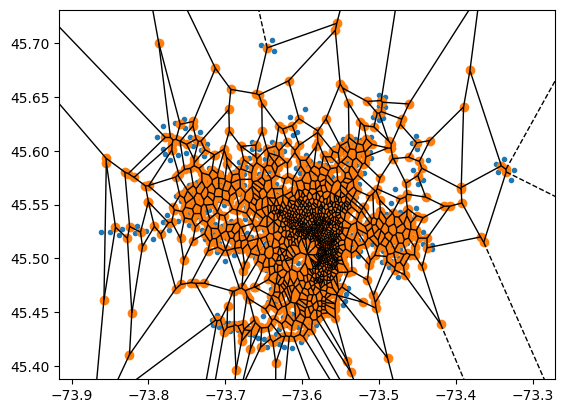

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
fig = voronoi_plot_2d(vor)
plt.show()